### Thin Snow case

In [1]:
-87.52,80.14,-86.45,80.39

(-87.52, 80.14, -86.45, 80.39)

In [2]:
import xarray as xr

# # --- User-defined variables ---
# input_file = r"C:\Users\SmartICE_Calgary\Downloads\JY_CS2_wfm\CS_OFFL_SIR_SIN_1B_20240411T105309_20240411T105755_E001.nc"
# output_file = "subset_CS_OFFL_SIR_SIN_1B_20240411T105309_20240411T105755_E001.nc"

input_file = r"C:\Users\SmartICE_Calgary\Downloads\JY_CS2_wfm\CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc"
output_file = "subset_CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc"

lat_min, lat_max = 80.14, 80.39  # Thin snow case #degrees North
lon_min, lon_max = -87.52, -86.45  # Thin snow case #degrees East (convert if using 0–360)

# --- Open the dataset ---
ds = xr.open_dataset(input_file)

# --- Ensure lon is in the correct range ---
lon = ds["lon_20_ku"]
if lon.max() > 180:
    lon = (((lon + 180) % 360) - 180)

lat = ds["lat_20_ku"]

# --- Create mask based on bounding box ---
mask = (
    (lat >= lat_min) & (lat <= lat_max) &
    (lon >= lon_min) & (lon <= lon_max)
)

# --- Apply mask to all variables with time_20_ku dimension ---
def mask_variable(var):
    if "time_20_ku" in var.dims:
        return var.where(mask, drop=True)
    return var

subset = ds.map(mask_variable)

# --- Save subset to new NetCDF ---
subset.to_netcdf(output_file)
print(f"Subset saved to {output_file}")
ds.close()


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\488443316.py:38: SerializationWarning: saving variable pwr_waveform_plrm_01_ku with floating point data as an integer dtype without any _FillValue to use for NaNs
  subset.to_netcdf(output_file)
C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\488443316.py:38: SerializationWarning: saving variable pwr_waveform_plrm_20_ku with floating point data as an integer dtype without any _FillValue to use for NaNs
  subset.to_netcdf(output_file)


Subset saved to subset_CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc


In [6]:
import numpy as np

# Load both subsetted datasets
ds1 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240411T105309_20240411T105755_E001.nc")
ds2 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc")

# Extract lat, lon, and time
lat1, lon1, time1 = ds1["lat_20_ku"].values, ds1["lon_20_ku"].values, ds1["time_20_ku"].values
lat2, lon2, time2 = ds2["lat_20_ku"].values, ds2["lon_20_ku"].values, ds2["time_20_ku"].values

# Round lat/lon for intersection tolerance (adjust decimal as needed)
decimals = 1
coords1 = set(zip(np.round(lat1, decimals), np.round(lon1, decimals)))
coords2 = set(zip(np.round(lat2, decimals), np.round(lon2, decimals)))

# Find intersecting lat/lon pairs
intersect_coords = coords1 & coords2

print(f"Found {len(intersect_coords)} intersecting coordinates.")
print(f"The intersecting coordinates are {intersect_coords}.")

# Optional: get indices in both files for matching coords
def get_matching_indices(lat, lon, coords_set):
    lat_r = np.round(lat, decimals)
    lon_r = np.round(lon, decimals)
    return [i for i in range(len(lat)) if (lat_r[i], lon_r[i]) in coords_set]

indices1 = get_matching_indices(lat1, lon1, intersect_coords)
indices2 = get_matching_indices(lat2, lon2, intersect_coords)

print(indices1)
print(indices2)
# Get corresponding time values
matching_times_1 = time1[indices1]
matching_times_2 = time2[indices2]

print("Matching times in file 1:", matching_times_1)
print("Matching times in file 2:", matching_times_2)


ds1.close()
ds2.close()

Found 2 intersecting coordinates.
The intersecting coordinates are {(80.4, -86.9), (80.3, -86.9)}.
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Matching times in file 1: ['2024-04-11T10:54:34.412791936' '2024-04-11T10:54:34.457937920'
 '2024-04-11T10:54:34.503083904' '2024-04-11T10:54:34.548230016'
 '2024-04-11T10:54:34.593376000' '2024-04-11T10:54:34.638521984'
 '2024-04-11T10:54:34.683667968' '2024-04-11T10:54:34.728813952'
 '2024-04-11T10:54:34.773959936' '2024-04-11T10:54:34.819105920'
 '2024-04-11T10:54:34.864252032' '2024-04-11T10:54:34.909398016'
 '2024-04-11T10:54:34.954544000' '2024-04-11T10:54:34.999690112'
 '2024-04-11T10:54:35.044836096' '2024-04-11T10:54:35.089982080'
 '2024-04-11T10:54:35.135128064' '2024-04-11T10:54:35.180274048'
 '2024-04-11T10:54:35.225420032' '2024-04-11T10:54:35.270566016'

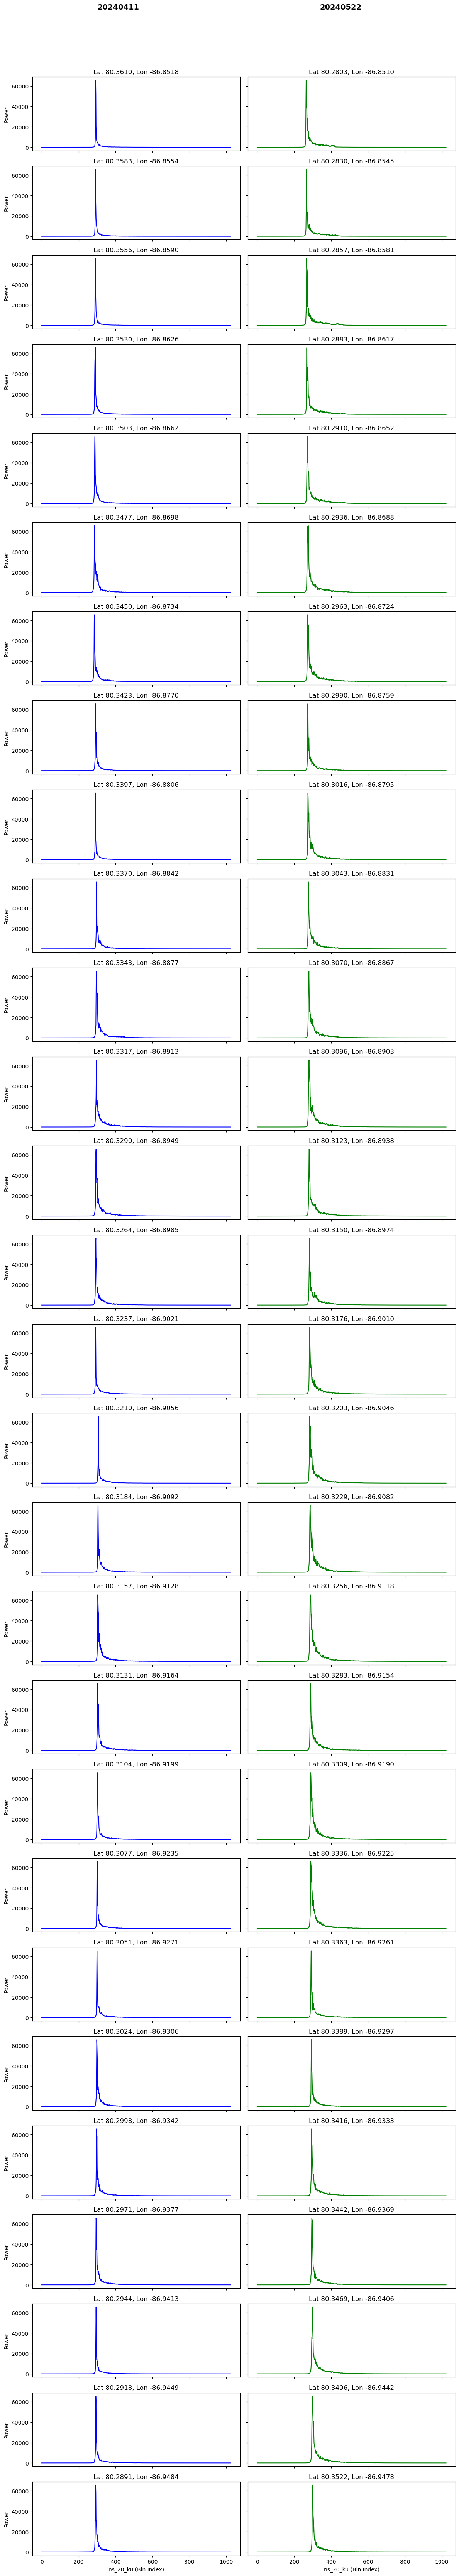

In [7]:
import matplotlib.pyplot as plt

plt.close('all')

# Choose how many matches to plot (e.g., first 5)
n_to_plot = min(45, len(indices1))

# Extract waveform data for matches
waveforms1 = ds1["pwr_waveform_20_ku"].isel(time_20_ku=indices1[:n_to_plot])
waveforms2 = ds2["pwr_waveform_20_ku"].isel(time_20_ku=indices2[:n_to_plot])

lats1 = ds1["lat_20_ku"].isel(time_20_ku=indices1[:n_to_plot])
lats2 = ds2["lat_20_ku"].isel(time_20_ku=indices2[:n_to_plot])

lons1 = ds1["lon_20_ku"].isel(time_20_ku=indices1[:n_to_plot])
lons2 = ds2["lon_20_ku"].isel(time_20_ku=indices2[:n_to_plot])


ns = ds1["ns_20_ku"].values  # assuming same in both files

# Plot side-by-side

fig, axs = plt.subplots(n_to_plot, 2, figsize=(12, 2.5 * n_to_plot), sharex=True, sharey=True)

# Plot each waveform pair
for i in range(n_to_plot):
    axs[i, 0].plot(ns, waveforms1[i], color="blue")
    axs[i, 1].plot(ns, waveforms2[i], color="green")

    axs[i, 0].set_ylabel("Power")
    axs[i, 0].set_title(f"Lat {lats1[i]:.4f}, Lon {lons1[i]:.4f}")
    axs[i, 1].set_title(f"Lat {lats2[i]:.4f}, Lon {lons2[i]:.4f}")

# Label x-axis of bottom row
for ax in axs[-1, :]:
    ax.set_xlabel("ns_20_ku (Bin Index)")

# Add column titles
fig.text(0.26, 0.95, "20240411", fontsize=14, fontweight='bold', ha='center')
fig.text(0.74, 0.95, "20240522", fontsize=14, fontweight='bold', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space for top text
plt.savefig("thin.pdf")
plt.show()


### Thick Snow case

In [53]:
-98.8294,79.8064,-96.6055,80.1494

(-98.8294, 79.8064, -96.6055, 80.1494)

In [8]:
import xarray as xr

# # --- User-defined variables ---
# input_file = r"C:\Users\SmartICE_Calgary\Downloads\JY_CS2_wfm\thick\CS_OFFL_SIR_SIN_1B_20240406T114803_20240406T115232_E001.nc"
# output_file = "subset_CS_OFFL_SIR_SIN_1B_20240406T114803_20240406T115232_E001.nc"

input_file = r"C:\Users\SmartICE_Calgary\Downloads\JY_CS2_wfm\thick\CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc"
output_file = "subset_CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc"

lat_min, lat_max = 79.8064, 80.1494  ##degrees North
lon_min, lon_max = -98.8294, -96.6055  ##degrees East (convert if using 0–360)

# --- Open the dataset ---
ds = xr.open_dataset(input_file)

# --- Ensure lon is in the correct range ---
lon = ds["lon_20_ku"]
if lon.max() > 180:
    lon = (((lon + 180) % 360) - 180)

lat = ds["lat_20_ku"]

# --- Create mask based on bounding box ---
mask = (
    (lat >= lat_min) & (lat <= lat_max) &
    (lon >= lon_min) & (lon <= lon_max)
)

# --- Apply mask to all variables with time_20_ku dimension ---
def mask_variable(var):
    if "time_20_ku" in var.dims:
        return var.where(mask, drop=True)
    return var

subset = ds.map(mask_variable)

# --- Save subset to new NetCDF ---
subset.to_netcdf(output_file)
print(f"Subset saved to {output_file}")

ds.close()


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\36193179.py:38: SerializationWarning: saving variable pwr_waveform_plrm_01_ku with floating point data as an integer dtype without any _FillValue to use for NaNs
  subset.to_netcdf(output_file)
C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\36193179.py:38: SerializationWarning: saving variable pwr_waveform_plrm_20_ku with floating point data as an integer dtype without any _FillValue to use for NaNs
  subset.to_netcdf(output_file)


Subset saved to subset_CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc


In [70]:
import numpy as np

# Load both subsetted datasets
ds1 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240406T114803_20240406T115232_E001.nc")
ds2 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc")

# Extract lat, lon, and time
lat1, lon1, time1 = ds1["lat_20_ku"].values, ds1["lon_20_ku"].values, ds1["time_20_ku"].values
lat2, lon2, time2 = ds2["lat_20_ku"].values, ds2["lon_20_ku"].values, ds2["time_20_ku"].values

# Round lat/lon for intersection tolerance (adjust decimal as needed)
decimals = 1
coords1 = set(zip(np.round(lat1, decimals), np.round(lon1, decimals)))
coords2 = set(zip(np.round(lat2, decimals), np.round(lon2, decimals)))

# Find intersecting lat/lon pairs
intersect_coords = coords1 & coords2

print(f"Found {len(intersect_coords)} intersecting coordinates.")

# Optional: get indices in both files for matching coords
def get_matching_indices(lat, lon, coords_set):
    lat_r = np.round(lat, decimals)
    lon_r = np.round(lon, decimals)
    return [i for i in range(len(lat)) if (lat_r[i], lon_r[i]) in coords_set]

indices1 = get_matching_indices(lat1, lon1, intersect_coords)
indices2 = get_matching_indices(lat2, lon2, intersect_coords)

# Get corresponding time values
matching_times_1 = time1[indices1]
matching_times_2 = time2[indices2]

print("Matching times in file 1:", matching_times_1)
print("Matching times in file 2:", matching_times_2)

ds1.close()
ds2.close()

Found 2 intersecting coordinates.
Matching times in file 1: ['2024-04-06T11:49:04.472334976' '2024-04-06T11:49:04.517521920'
 '2024-04-06T11:49:04.562708992' '2024-04-06T11:49:04.607895936'
 '2024-04-06T11:49:04.653083008' '2024-04-06T11:49:04.698269952'
 '2024-04-06T11:49:04.743456896' '2024-04-06T11:49:04.788643968'
 '2024-04-06T11:49:04.833830912' '2024-04-06T11:49:04.879017984'
 '2024-04-06T11:49:04.924204928' '2024-04-06T11:49:04.969392000'
 '2024-04-06T11:49:05.014579072' '2024-04-06T11:49:05.059766016'
 '2024-04-06T11:49:05.104953088' '2024-04-06T11:49:05.150140032'
 '2024-04-06T11:49:05.195327104' '2024-04-06T11:49:05.240514048'
 '2024-04-06T11:49:05.285700992' '2024-04-06T11:49:05.330886912'
 '2024-04-06T11:49:05.376072960' '2024-04-06T11:49:05.421259008'
 '2024-04-06T11:49:05.466444928' '2024-04-06T11:49:05.511630976'
 '2024-04-06T11:49:05.556817024' '2024-04-06T11:49:05.602002944'
 '2024-04-06T11:49:05.647188992' '2024-04-06T11:49:05.692376064'
 '2024-04-06T11:49:05.73756198

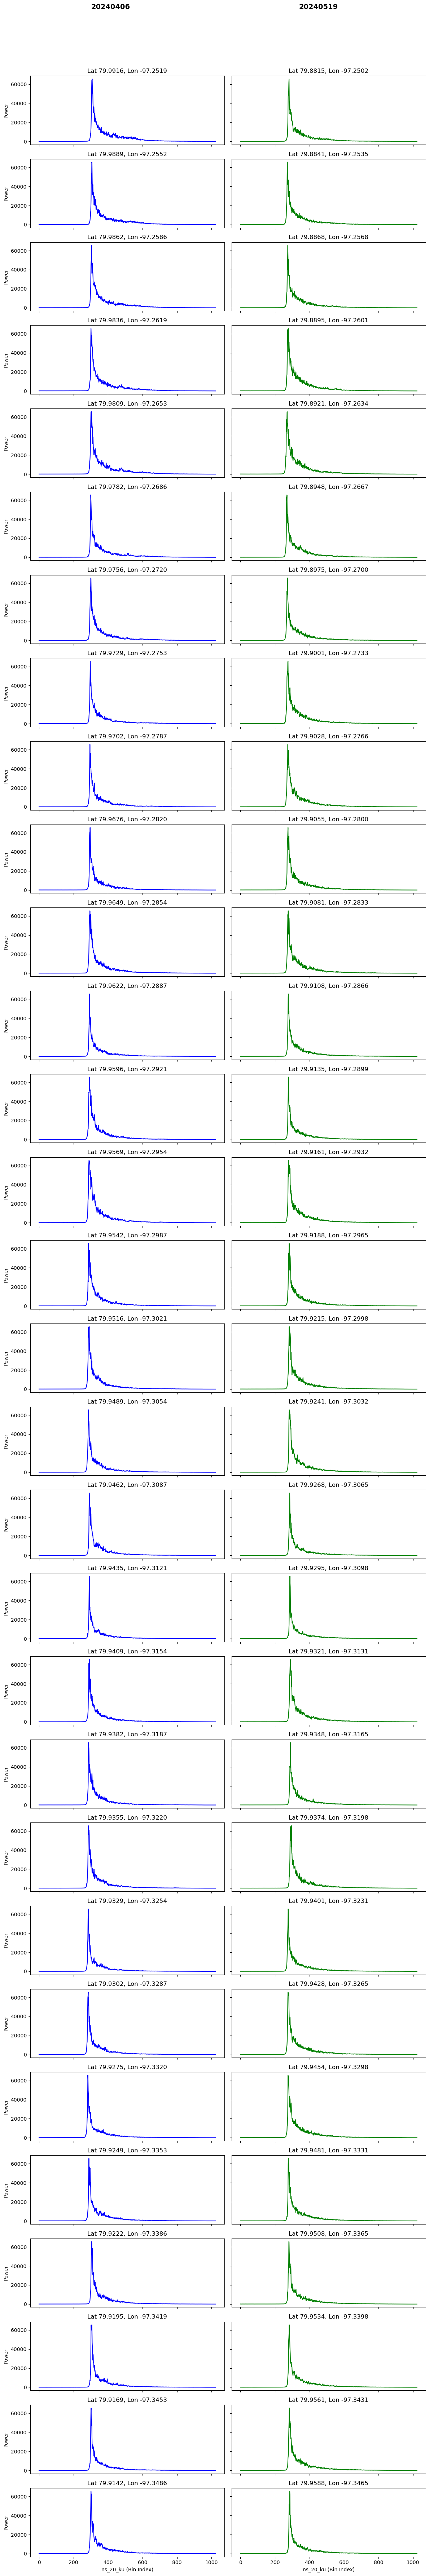

In [71]:
import matplotlib.pyplot as plt

plt.close('all')

# Choose how many matches to plot (e.g., first 5)
n_to_plot = min(45, len(indices1))

# Extract waveform data for matches
waveforms1 = ds1["pwr_waveform_20_ku"].isel(time_20_ku=indices1[:n_to_plot])
waveforms2 = ds2["pwr_waveform_20_ku"].isel(time_20_ku=indices2[:n_to_plot])

lats1 = ds1["lat_20_ku"].isel(time_20_ku=indices1[:n_to_plot])
lats2 = ds2["lat_20_ku"].isel(time_20_ku=indices2[:n_to_plot])

lons1 = ds1["lon_20_ku"].isel(time_20_ku=indices1[:n_to_plot])
lons2 = ds2["lon_20_ku"].isel(time_20_ku=indices2[:n_to_plot])


ns = ds1["ns_20_ku"].values  # assuming same in both files

# Plot side-by-side

fig, axs = plt.subplots(n_to_plot, 2, figsize=(12, 2.5 * n_to_plot), sharex=True, sharey=True)

# Plot each waveform pair
for i in range(n_to_plot):
    axs[i, 0].plot(ns, waveforms1[i], color="blue")
    axs[i, 1].plot(ns, waveforms2[i], color="green")

    axs[i, 0].set_ylabel("Power")
    axs[i, 0].set_title(f"Lat {lats1[i]:.4f}, Lon {lons1[i]:.4f}")
    axs[i, 1].set_title(f"Lat {lats2[i]:.4f}, Lon {lons2[i]:.4f}")

# Label x-axis of bottom row
for ax in axs[-1, :]:
    ax.set_xlabel("ns_20_ku (Bin Index)")

# Add column titles
fig.text(0.26, 0.95, "20240406", fontsize=14, fontweight='bold', ha='center')
fig.text(0.74, 0.95, "20240519", fontsize=14, fontweight='bold', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space for top text
plt.savefig("thick.pdf")
plt.show()



### Extract as csv for ArcGIS


In [8]:
# output_file = "subset_CS_OFFL_SIR_SIN_1B_20240406T114803_20240406T115232_E001.nc"
# output_file = "subset_CS_OFFL_SIR_SIN_1B_20240411T105309_20240411T105755_E001.nc"
# output_file = "subset_CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc"
output_file = "subset_CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc"
output_file[26:34]

'20240522'

In [9]:
import netCDF4 as nc
import pandas as pd

# Load the NetCDF file
ncfile = nc.Dataset(output_file)

# Extract the variables
lat = ncfile.variables['lat_20_ku'][:]
lon = ncfile.variables['lon_20_ku'][:]
window_del = ncfile.variables['window_del_20_ku'][:]

# Combine into a DataFrame
df = pd.DataFrame({
    'lat_20_ku': lat,
    'lon_20_ku': lon,
    'window_del_20_ku': window_del
})

# Save to CSV
df.to_csv(f"cryosat2_points_{output_file[26:34]}.csv", index=False)


### Added July 13, 2025

In [1]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [54]:
# THIN CASE

# Load both subsetted datasets
ds1 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240411T105309_20240411T105755_E001.nc")
ds2 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc")

# Extract lat, lon, and time
lat1, lon1, time1 = ds1["lat_20_ku"].values, ds1["lon_20_ku"].values, ds1["time_20_ku"].values
lat2, lon2, time2 = ds2["lat_20_ku"].values, ds2["lon_20_ku"].values, ds2["time_20_ku"].values

# Round lat/lon for intersection tolerance (adjust decimal as needed)
decimals = 99
coords1 = set(zip(lat1, lon1))
coords2 = set(zip(lat2, lon2))


def points_within_bounding_box(points, bbox):
    """
    Filters points within a bounding box.
    
    Args:
        points (list of tuples): List of (latitude, longitude) tuples.
        bbox (tuple): Bounding box as (min_lat, min_lon, max_lat, max_lon).
        
    Returns:
        list of tuples: Points within the bounding box.
    """
    min_lat, min_lon, max_lat, max_lon = bbox

    inside_points = [
        (lat, lon) for lat, lon in points
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon
    ]
    # return [i for i in range(len(lat)) if (lat[i], lon[i]) in inside_points]
    return inside_points

bbox = (80.237, -87.015, 80.299,  -86.794)

inside1 = points_within_bounding_box(coords1, bbox)
inside2 = points_within_bounding_box(coords2, bbox)

# Get corresponding time values

ds1.close()
ds2.close

### Jul 13, 2025
# THIN
### Dropping by rec_count_20_ku, check that lat/lon start/end are correct
ds1_bbox_tmp = ds1.where(ds1.rec_count_20_ku>=ds1.rec_count_20_ku.values.min()+33, drop=True) # thick case 20240406 start 1 80.148 -97.050 end 32 80.066 -97.157
ds1_bbox = ds1_bbox_tmp.where(ds1_bbox_tmp.rec_count_20_ku<=ds1_bbox_tmp.rec_count_20_ku.values.min()+57-34, drop=True) # thick case 20240406 start 1 80.148 -97.050 end 32 80.066 -97.157
# ds1_bbox['lon_20_ku']

# ds2.where(ds2.rec_count_20_ku<=523, drop=True)
ds2_tmp = ds2.where(ds2.rec_count_20_ku<=ds2.rec_count_20_ku.values.min()+59, drop=True) # thick case 20240519 start 93 80.052 -97.464 end 126 80.139 -97.577
ds2_bbox = ds2_tmp.where(ds2_tmp.rec_count_20_ku>=ds2.rec_count_20_ku.values.min()+36, drop=True) 


In [3]:
### Added July 13, 2025
# THICK CASE

# Load both subsetted datasets
ds1 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240406T114803_20240406T115232_E001.nc")
ds2 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc")

# Extract lat, lon, and time
lat1, lon1, time1 = ds1["lat_20_ku"].values, ds1["lon_20_ku"].values, ds1["time_20_ku"].values
lat2, lon2, time2 = ds2["lat_20_ku"].values, ds2["lon_20_ku"].values, ds2["time_20_ku"].values

# Round lat/lon for intersection tolerance (adjust decimal as needed)
decimals = 99
coords1 = set(zip(lat1, lon1))
coords2 = set(zip(lat2, lon2))


def points_within_bounding_box(points, bbox):
    """
    Filters points within a bounding box.
    
    Args:
        points (list of tuples): List of (latitude, longitude) tuples.
        bbox (tuple): Bounding box as (min_lat, min_lon, max_lat, max_lon).
        
    Returns:
        list of tuples: Points within the bounding box.
    """
    min_lat, min_lon, max_lat, max_lon = bbox

    inside_points = [
        (lat, lon) for lat, lon in points
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon
    ]
    # return [i for i in range(len(lat)) if (lat[i], lon[i]) in inside_points]
    return inside_points

bbox = (80.052, -97.577, 80.148,  -97.050)

inside1 = points_within_bounding_box(coords1, bbox)
inside2 = points_within_bounding_box(coords2, bbox)

# Get corresponding time values

ds1.close()
ds2.close()

### Jul 13, 2025
# THICK
### Dropping by rec_count_20_ku, check that lat/lon start/end are correct
ds1_bbox = ds1.where(ds1.rec_count_20_ku<=524, drop=True) # thick case 20240406 start 1 80.148 -97.050 end 32 80.066 -97.157

# ds2.where(ds2.rec_count_20_ku<=523, drop=True)
ds2_tmp = ds2.where(ds2.rec_count_20_ku<=ds2.rec_count_20_ku.values.min()+125, drop=True) # thick case 20240519 start 93 80.052 -97.464 end 126 80.139 -97.577
ds2_bbox = ds2_tmp.where(ds2_tmp.rec_count_20_ku>=ds2.rec_count_20_ku.values.min()+92, drop=True) 

In [4]:
# points_within_bounding_box(coords1, bbox)
# coords1
# time1
# inside1
# ds1["time_20_ku"].where(ds1.lat_20_ku==[inside1[i][0] for i in range(len(inside1))])
ds1['rec_count_20_ku'].values
# ds1["time_20_ku"].where(ds1.rec_count_20_ku==492.)#[inside1[i][0] for i in range(len(inside1))])
# ds1['lat_20_ku'].where(ds1.rec_count_20_ku>=491)# & ds1.rec_count_20_ku<=523)


array([491., 492., 493., 494., 495., 496., 497., 498., 499., 500., 501.,
       502., 503., 504., 505., 506., 507., 508., 509., 510., 511., 512.,
       513., 514., 515., 516., 517., 518., 519., 520., 521., 522., 523.,
       524., 525., 526., 527., 528., 529., 530., 531., 532., 533., 534.,
       535., 536., 537., 538., 539., 540., 541., 542., 543., 544., 545.,
       546., 547., 548., 549., 550., 551., 552., 553., 554., 555., 556.,
       557., 558., 559., 560., 561., 562., 563., 564., 565., 566., 567.,
       568., 569., 570., 571., 572., 573., 574., 575., 576., 577., 578.,
       579., 580., 581., 582., 583., 584., 585., 586., 587., 588., 589.,
       590., 591., 592., 593., 594., 595., 596., 597., 598., 599., 600.,
       601., 602., 603., 604., 605., 606., 607., 608., 609., 610., 611.,
       612., 613., 614., 615., 616., 617., 618., 619.])

In [5]:
# ds1_bbox['lat_20_ku']
# ds1_bbox['lon_20_ku']
ds2_bbox['lat_20_ku']


<xarray.DataArray 'lat_20_ku' (time_20_ku: 34)>
array([80.0520432, 80.0547075, 80.0573718, 80.060036 , 80.0627003,
       80.0653645, 80.0680286, 80.0706928, 80.0733569, 80.0760209,
       80.078685 , 80.081349 , 80.084013 , 80.0866769, 80.0893408,
       80.0920048, 80.0946686, 80.0973324, 80.0999962, 80.10266  ,
       80.1053237, 80.1079874, 80.1106511, 80.1133147, 80.1159783,
       80.1186419, 80.1213055, 80.123969 , 80.1266325, 80.1292959,
       80.1319593, 80.1346227, 80.137286 , 80.1399494])
Coordinates:
    lat_20_ku   (time_20_ku) float64 80.05 80.05 80.06 ... 80.13 80.14 80.14
    lon_20_ku   (time_20_ku) float64 -97.46 -97.47 -97.47 ... -97.57 -97.58
  * time_20_ku  (time_20_ku) datetime64[ns] 2024-05-19T20:08:41.584781056 ......
Attributes:
    comment:        Latitude of nadir location [-90,+90]. Positive latitude i...
    long_name:      20 Hz latitude
    standard_name:  latitude
    units:          degrees_north

In [5]:
def plot_wfm(ds, i, bin_start=0, bin_end=1024, ylim=None, ax=None):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

    
# Apply scaling to convert waveforms to power in watts
# scaled_waveforms = waveforms * echo_scale_factor[:, None] * (2.0 ** echo_scale_pwr[:, None])
    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)

# Convert the power in watts to dB
# scaled_waveforms_db = 10 * np.log10(scaled_waveforms)

# Normalize the waveform for each individual waveform
# scaled_waveforms_normalized = scaled_waveforms / np.max(scaled_waveforms, axis=1)[:, None]

# Plot a subset of waveforms along the track (e.g., first 50 measurements)
    # plt.figure(figsize=(12, 6))
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
# Plot the first 50 waveforms (you can modify this for a different range)
# num_waveforms_to_plot = 50
    ax.plot(scaled_waveform[i, bin_start:bin_end], color='red') #, label=f"Lat: {latitudes[min_index]:.4f}, Lon: {longitudes[min_index]:.4f}")
    
    # plt.title("CryoSat-2 Radar Waveforms (Power) Along Track")
    ax.set_title(time[i].values)
    ax.set_xlabel("Range Gate")
    ticks = np.arange(bin_start, bin_end+1, 20)  # from 270 to 450 with step 10
    # custom_labels = list(range(bin_start, bin_end, int((bin_end - bin_start) / (len(scaled_waveform[i, bin_start:bin_end]) - 1))))
    ax.axvline(300-bin_start, color='k', ls='--', lw=1, alpha=0.7, zorder=0)
# Replace x-ticks (1 to 10) with 270 to 450 labels
    ax.set_xticks(ticks=ticks-bin_start, labels=ticks)
    ax.set_ylabel("Power (Watts)")
    if ylim==None:
        ylim = scaled_waveform.max()*1.1
    ax.set_ylim(0, ylim)
    ax.grid(alpha=0.7, zorder=0)      
    plt.tight_layout()
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))  # Place legend outside the plot
    # plt.show()
    return ax


In [6]:
def plot_wfm_one(ds, bin_start=0, bin_end=1024, ylim=None, ax=None):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
# Plot the first 50 waveforms (you can modify this for a different range)
# num_waveforms_to_plot = 50
    n_to_plot = len(ds.rec_count_20_ku)
    print(n_to_plot)
# Generate a colormap with n_lines colors
# Use new-style colormap access
    cmap = plt.colormaps['viridis']  # or matplotlib.colormaps.get_cmap('viridis')
    
    # Create a ScalarMappable with a normalized range
    norm = mcolors.Normalize(vmin=0, vmax=n_to_plot - 1)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    
      
    # ylim = 1.5e-12#10e-13
    for i in range(n_to_plot):
        # j = n_to_plot - i - 1
        # # fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
        # plot_wfm(ds, i, bin_start=270, bin_end=450, ylim = ylim, ax=axes[0])
        # plot_wfm(ds2_bbox, j, bin_start=230, bin_end=410, ylim = ylim, ax=axes[1])
        
        ax.plot(scaled_waveform[i, bin_start:bin_end], color=cmap(norm(i))) #, label=f"Lat: {latitudes[min_index]:.4f}, Lon: {longitudes[min_index]:.4f}")

        print(str(time[i].values))
        
    # ax.set_title(time[i].values)
    ax.set_title(str(time[i].values)[:10])
    ax.set_xlabel("Range Gate")
    ticks = np.arange(bin_start, bin_end+1, 20)  # from 270 to 450 with step 10
    # custom_labels = list(range(bin_start, bin_end, int((bin_end - bin_start) / (len(scaled_waveform[i, bin_start:bin_end]) - 1))))
    ax.axvline(300-bin_start, color='k', ls='--', lw=1, alpha=0.7, zorder=0)
# Replace x-ticks (1 to 10) with 270 to 450 labels
    ax.set_xticks(ticks=ticks-bin_start, labels=ticks)
    ax.set_ylabel("Power (Watts)")
    if ylim==None:
        ylim = scaled_waveform.max()*1.1
# Optional: add colorbar showing the line indices
    cbar = plt.colorbar(sm, ax=ax, ticks=range(n_to_plot))
    cbar.set_ticklabels(time.values)#)
    # cbar.set_label('Index')  
    
    ax.set_ylim(0, ylim)
    ax.grid(alpha=0.7, zorder=0)      
    plt.tight_layout()
        # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))  # Place legend outside the plot
    # plt.show()
    return ax


In [7]:
def plot_wfm_mean(ds, bin_start=0, bin_end=1024, ylim=None, ax=None):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
# Plot the first 50 waveforms (you can modify this for a different range)
# num_waveforms_to_plot = 50
    n_to_plot = len(ds.rec_count_20_ku)
    
    # Calculate mean and std
    mean_waveform = np.mean(scaled_waveform, axis=0)
    std_waveform = np.std(scaled_waveform, axis=0)

    # Create axis if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))

    # Plot
    bins = np.arange(bin_start, bin_end)
    ax.plot(bins, mean_waveform[bin_start:bin_end], label='Mean waveform', color='red', lw=2)
    ax.fill_between(bins, mean_waveform[bin_start:bin_end] - std_waveform[bin_start:bin_end],
                    mean_waveform[bin_start:bin_end] + std_waveform[bin_start:bin_end],
                    color='gray', alpha=0.3, label='±1 Std Dev')

    ax.set_xlabel("Range Gate")
    ax.set_ylabel("Power (Watts)")
    # ax.set_title("Mean and Std Dev of Scaled Waveforms")
    ax.grid(True)
    if ylim==None:
        ylim = mean_waveform[bin_start:bin_end].max()*1.9
    ax.set_ylim(0, ylim)
    ax.legend()

    return ax


<Axes: xlabel='Range Gate', ylabel='Power (Watts)'>

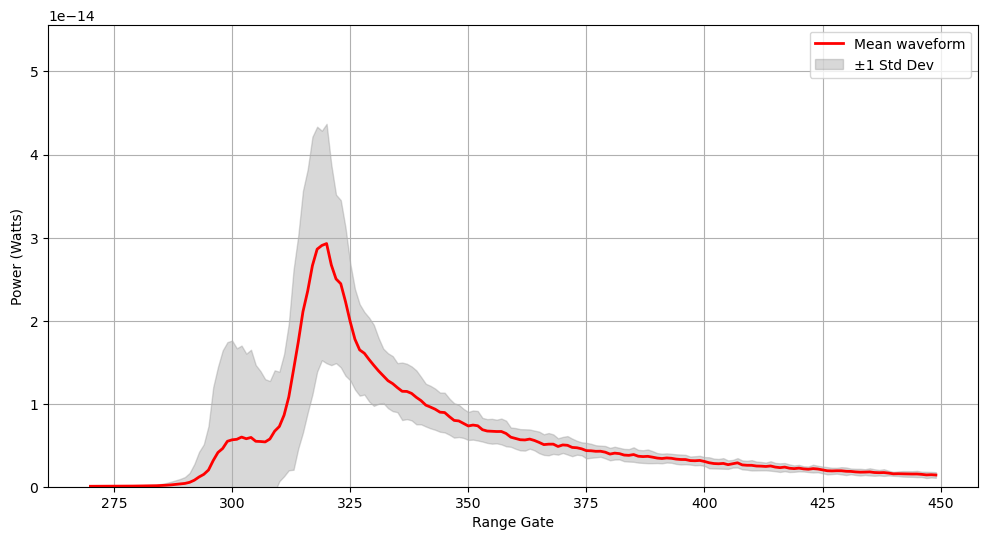

In [14]:
plot_wfm_mean(ds1_bbox, bin_start=270, bin_end=450)


34
2024-04-06T11:49:01.806257920
2024-04-06T11:49:01.851446016
2024-04-06T11:49:01.896633984
2024-04-06T11:49:01.941822080
2024-04-06T11:49:01.987010048
2024-04-06T11:49:02.032198016
2024-04-06T11:49:02.077385984
2024-04-06T11:49:02.122573952
2024-04-06T11:49:02.167762048
2024-04-06T11:49:02.212950016
2024-04-06T11:49:02.258137984
2024-04-06T11:49:02.303325952
2024-04-06T11:49:02.348513920
2024-04-06T11:49:02.393702016
2024-04-06T11:49:02.438889984
2024-04-06T11:49:02.484078080
2024-04-06T11:49:02.529266048
2024-04-06T11:49:02.574453888
2024-04-06T11:49:02.619641984
2024-04-06T11:49:02.664829952
2024-04-06T11:49:02.710018048
2024-04-06T11:49:02.755206016
2024-04-06T11:49:02.800394112
2024-04-06T11:49:02.845581952
2024-04-06T11:49:02.890769920
2024-04-06T11:49:02.935958016
2024-04-06T11:49:02.981145984
2024-04-06T11:49:03.026332928
2024-04-06T11:49:03.071521024
2024-04-06T11:49:03.116708992
2024-04-06T11:49:03.161896960
2024-04-06T11:49:03.207083904
2024-04-06T11:49:03.252271104
2024-04

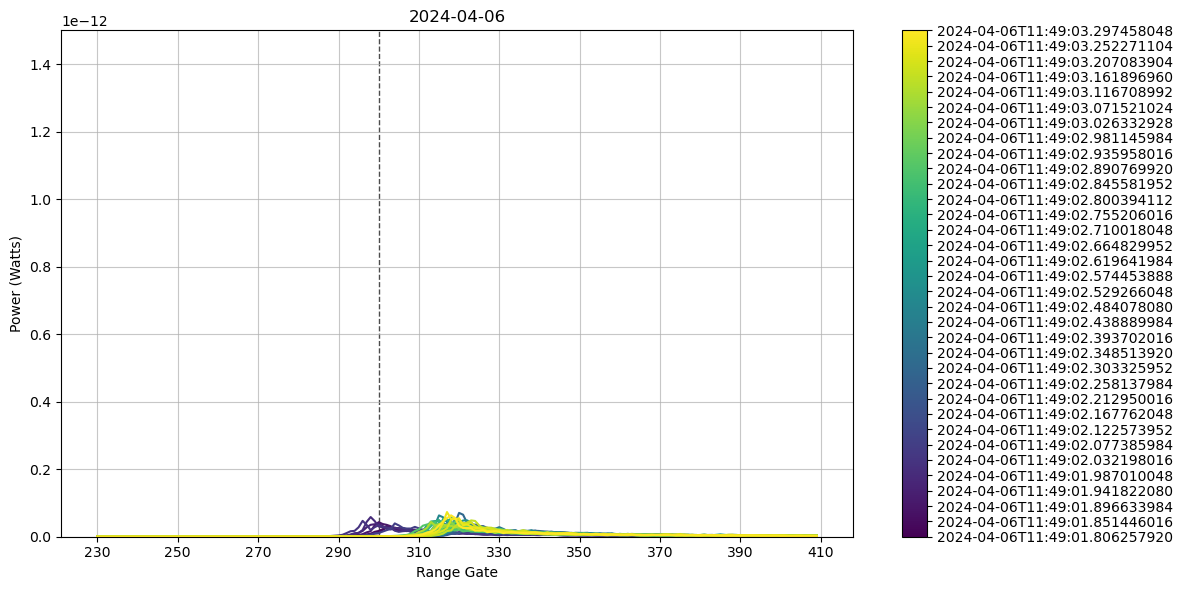

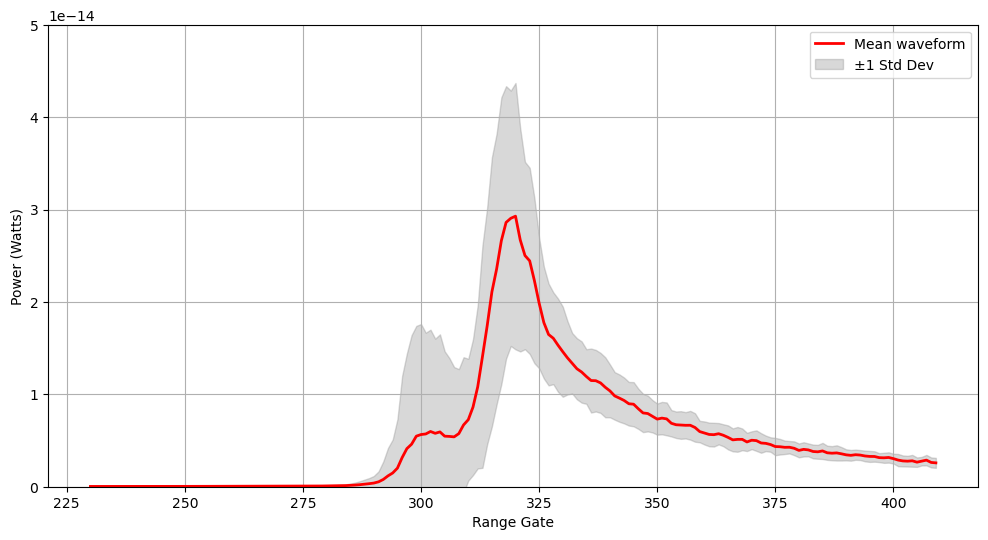

In [36]:
plot_wfm_one(ds1_bbox, bin_start=230, bin_end=410, ylim=1.5e-12)
plt.savefig('thick_20240406_ylim.png')

plot_wfm_mean(ds1_bbox, bin_start=230, bin_end=410, ylim=5e-14)
plt.savefig('thick_20240406_mean.png')

# plt.savefig('thick_20240406.png')
# plt.savefig('thin_20240411.png')
# plt.savefig('thin_20240411_ylim.png')

24
2024-04-11T10:54:35.451149952
2024-04-11T10:54:35.496296064
2024-04-11T10:54:35.541442048
2024-04-11T10:54:35.586587008
2024-04-11T10:54:35.631732992
2024-04-11T10:54:35.676879104
2024-04-11T10:54:35.722023936
2024-04-11T10:54:35.767169024
2024-04-11T10:54:35.812315008
2024-04-11T10:54:35.857460992
2024-04-11T10:54:35.902605952
2024-04-11T10:54:35.947751040
2024-04-11T10:54:35.992896000
2024-04-11T10:54:36.038040960
2024-04-11T10:54:36.083186048
2024-04-11T10:54:36.128331008
2024-04-11T10:54:36.173475968
2024-04-11T10:54:36.218621056
2024-04-11T10:54:36.263766016
2024-04-11T10:54:36.308910976
2024-04-11T10:54:36.354056960
2024-04-11T10:54:36.399202048
2024-04-11T10:54:36.444347008
2024-04-11T10:54:36.489492096


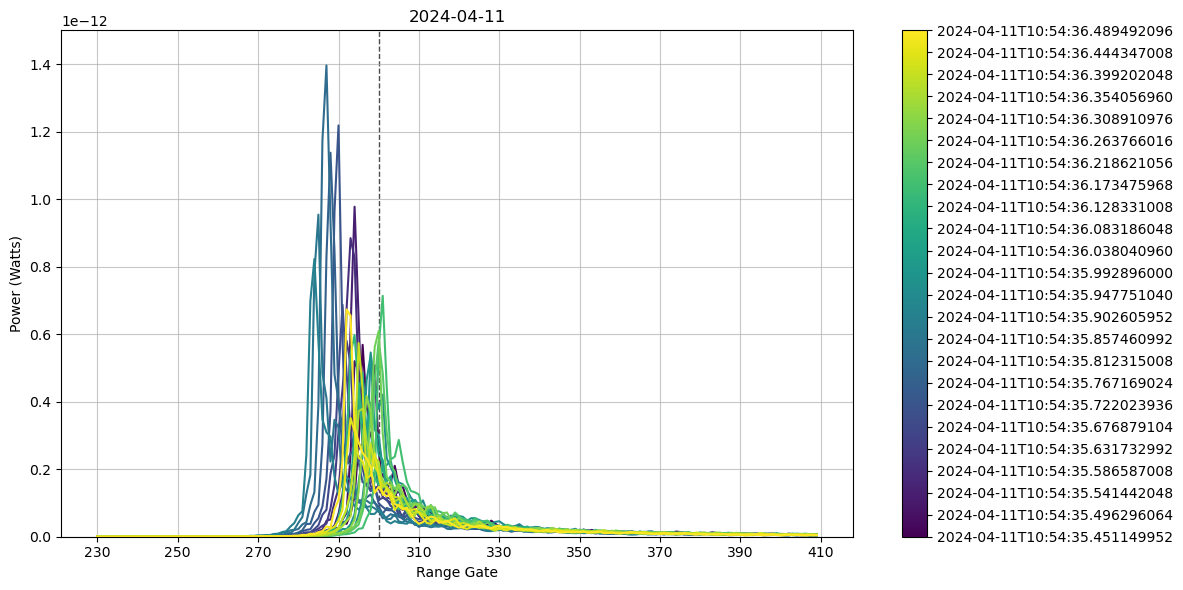

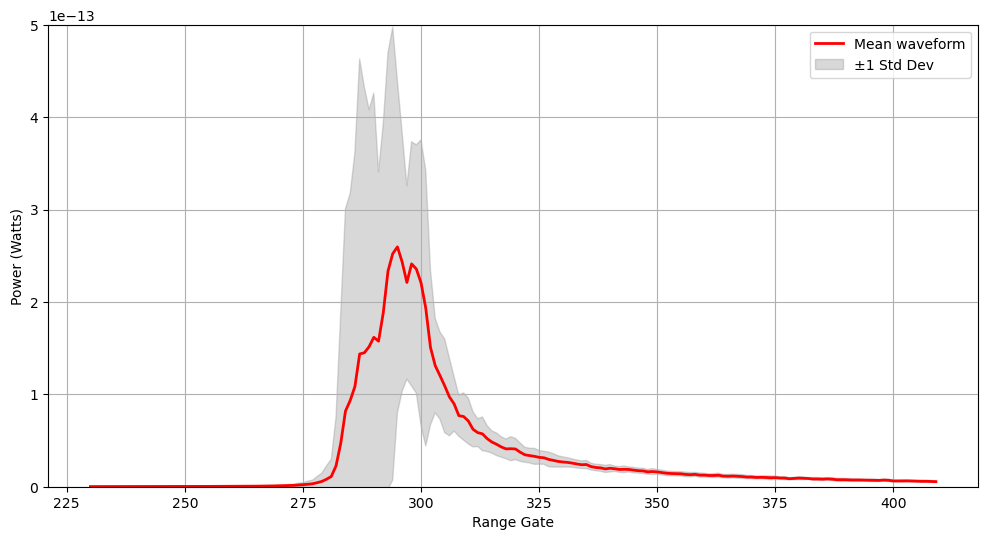

In [31]:
# plot_wfm_one(ds1_bbox, bin_start=230, bin_end=410)
plot_wfm_one(ds1_bbox, bin_start=230, bin_end=410, ylim=1.5e-12)
# plt.savefig('thick_20240406.png')
# plt.savefig('thick_20240406_ylim.png')
# plt.savefig('thin_20240411.png')
plt.savefig('thin_20240411_ylim.png')

plot_wfm_mean(ds1_bbox, bin_start=230, bin_end=410, ylim=5e-13)
plt.savefig('thin_20240411_mean.png')

34
2024-05-19T20:08:41.584781056
2024-05-19T20:08:41.629933056
2024-05-19T20:08:41.675084928
2024-05-19T20:08:41.720237056
2024-05-19T20:08:41.765388928
2024-05-19T20:08:41.810541056
2024-05-19T20:08:41.855692928
2024-05-19T20:08:41.900845056
2024-05-19T20:08:41.945997056
2024-05-19T20:08:41.991148928
2024-05-19T20:08:42.036301056
2024-05-19T20:08:42.081452928
2024-05-19T20:08:42.126605056
2024-05-19T20:08:42.171756928
2024-05-19T20:08:42.216909056
2024-05-19T20:08:42.262061952
2024-05-19T20:08:42.307214080
2024-05-19T20:08:42.352365952
2024-05-19T20:08:42.397518080
2024-05-19T20:08:42.442669952
2024-05-19T20:08:42.487822080
2024-05-19T20:08:42.532973952
2024-05-19T20:08:42.578125952
2024-05-19T20:08:42.623278080
2024-05-19T20:08:42.668429952
2024-05-19T20:08:42.713582976
2024-05-19T20:08:42.758736000
2024-05-19T20:08:42.803888000
2024-05-19T20:08:42.849040000
2024-05-19T20:08:42.894192000
2024-05-19T20:08:42.939344000
2024-05-19T20:08:42.984496000
2024-05-19T20:08:43.029648000
2024-05

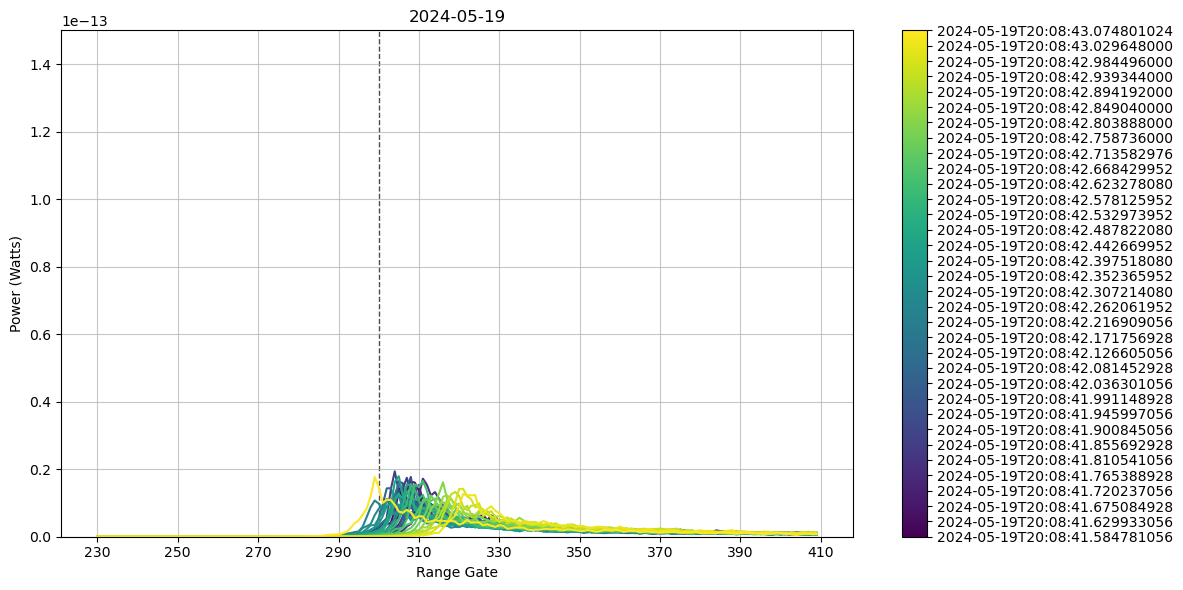

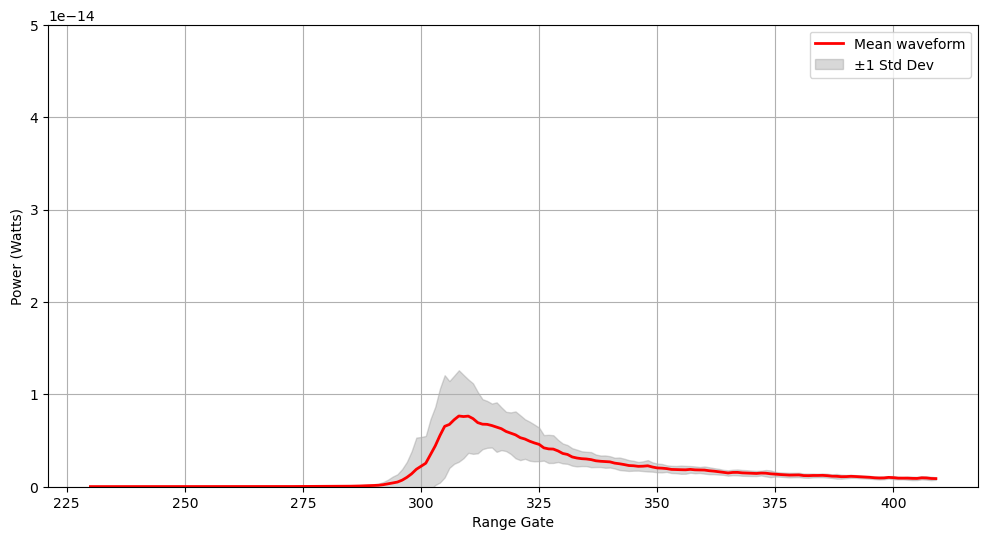

In [25]:
# plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410)
plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410, ylim=1.5e-13)
# plt.savefig('thick_20240519.png')
plt.savefig('thick_20240519_ylim.png')
# plt.savefig('thin_20240522.png')
# plt.savefig('thin_20240522_ylim.png')

plot_wfm_mean(ds2_bbox, bin_start=230, bin_end=410, ylim=5e-14)
plt.savefig('thick_20240519_mean.png')

24
2024-05-22T19:16:14.800227968
2024-05-22T19:16:14.845404032
2024-05-22T19:16:14.890583936
2024-05-22T19:16:14.935764992
2024-05-22T19:16:14.980945920
2024-05-22T19:16:15.026128000
2024-05-22T19:16:15.071308928
2024-05-22T19:16:15.116491008
2024-05-22T19:16:15.161675008
2024-05-22T19:16:15.206864000
2024-05-22T19:16:15.252055040
2024-05-22T19:16:15.297248000
2024-05-22T19:16:15.342440960
2024-05-22T19:16:15.387634944
2024-05-22T19:16:15.432829056
2024-05-22T19:16:15.478024064
2024-05-22T19:16:15.523218944
2024-05-22T19:16:15.568413952
2024-05-22T19:16:15.613608960
2024-05-22T19:16:15.658804096
2024-05-22T19:16:15.703999104
2024-05-22T19:16:15.749193984
2024-05-22T19:16:15.794388992
2024-05-22T19:16:15.839584000


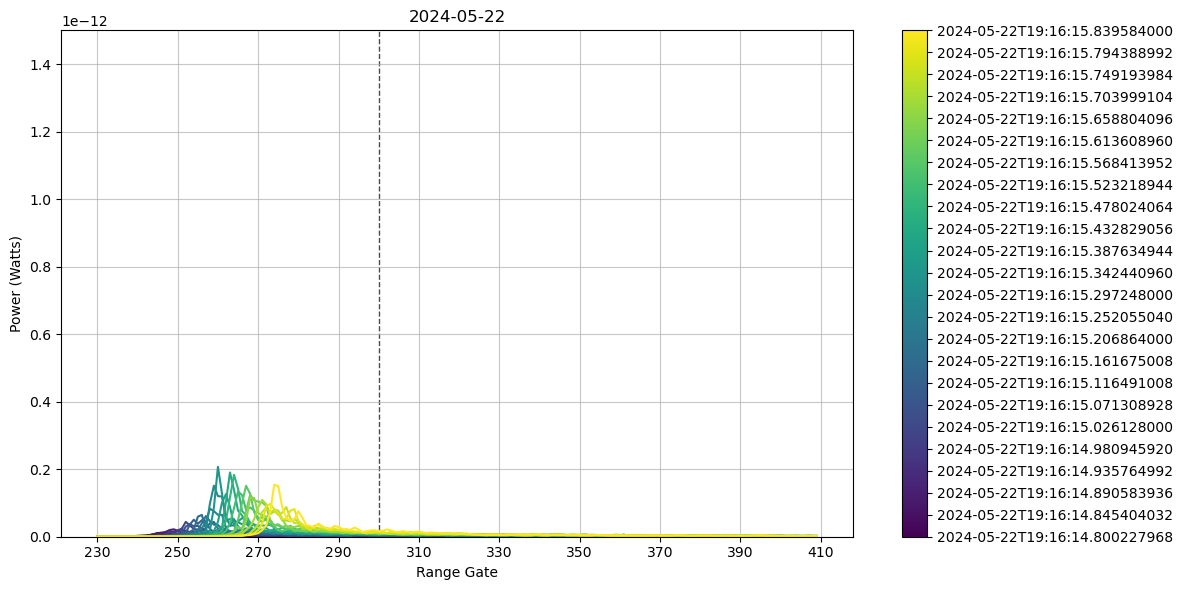

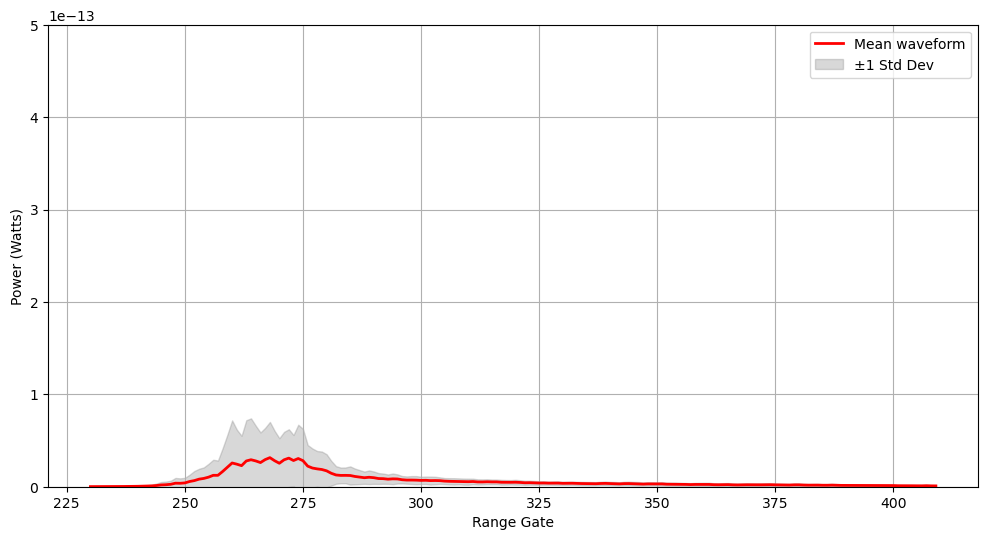

In [32]:
# plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410)
plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410, ylim=1.5e-12)
# plt.savefig('thick_20240519.png')
# plt.savefig('thick_20240519_ylim.png')
# plt.savefig('thin_20240522.png')
plt.savefig('thin_20240522_ylim.png')


plot_wfm_mean(ds2_bbox, bin_start=230, bin_end=410, ylim=5e-13)
plt.savefig('thin_20240522_mean.png')


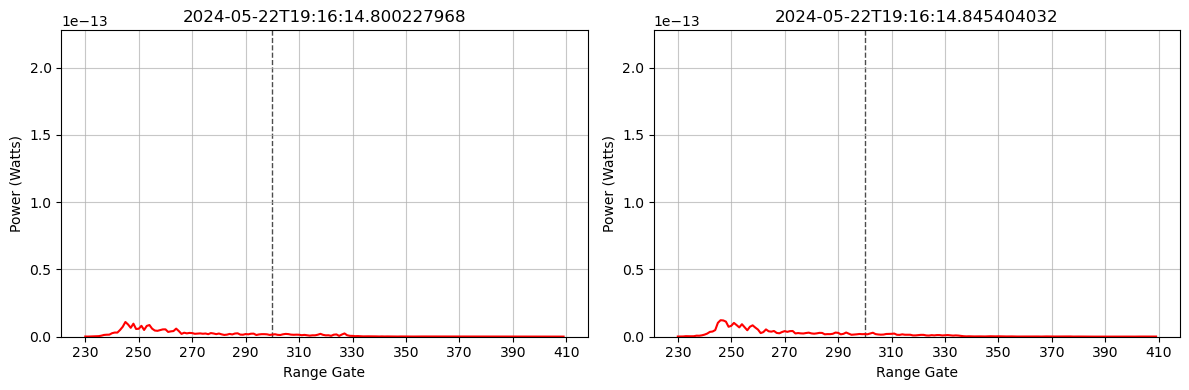

In [12]:
ds2_bbox_test = ds2_bbox.where(ds2_bbox.rec_count_20_ku==ds2.rec_count_20_ku.values.min()+94, drop=True) 

# for i in range(3):
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1x3 grid

for i, ax in enumerate(axes.flat):
    # plot_wfm(ds2_bbox, i, bin_start=270, bin_end=450, ax=ax)
    plot_wfm(ds2_bbox, i, bin_start=230, bin_end=410, ax=ax)
# plt.plot(ds2_bbox_test.pwr_waveform_20_ku[0, :])

In [33]:
plt.close('all')


In [247]:
# len(ds2_bbox.rec_count_20_ku)
# ds1_bbox.time_20_ku
# ds2_bbox.time_20_ku

In [296]:
# Thin 
n_to_plot = len(ds1_bbox.rec_count_20_ku)
ylim = 1.5e-12#10e-13
for i in range(n_to_plot):
    j = n_to_plot - i - 1
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450, ylim = ylim, ax=axes[0])
    plot_wfm(ds2_bbox, j, bin_start=230, bin_end=410, ylim = ylim, ax=axes[1])
    plt.savefig(f"wfm_fig{i}.png")
plt.close('all')


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\1730869135.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\1965372614.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))


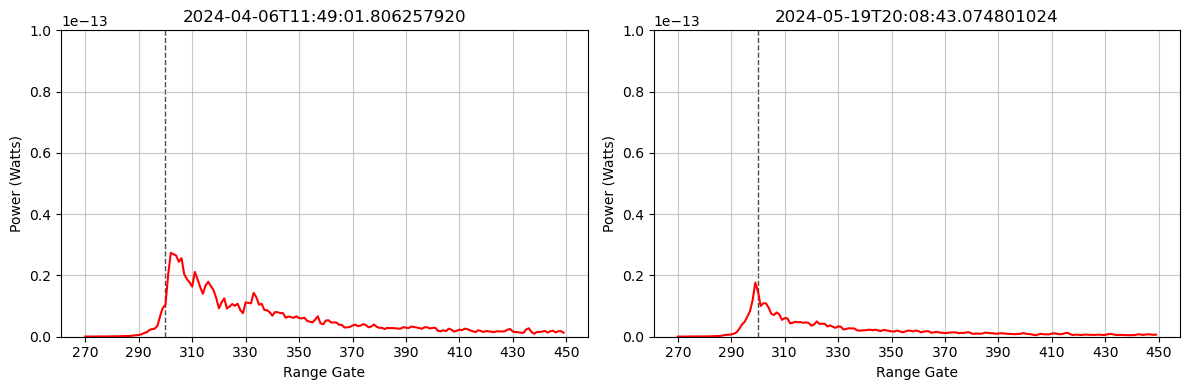

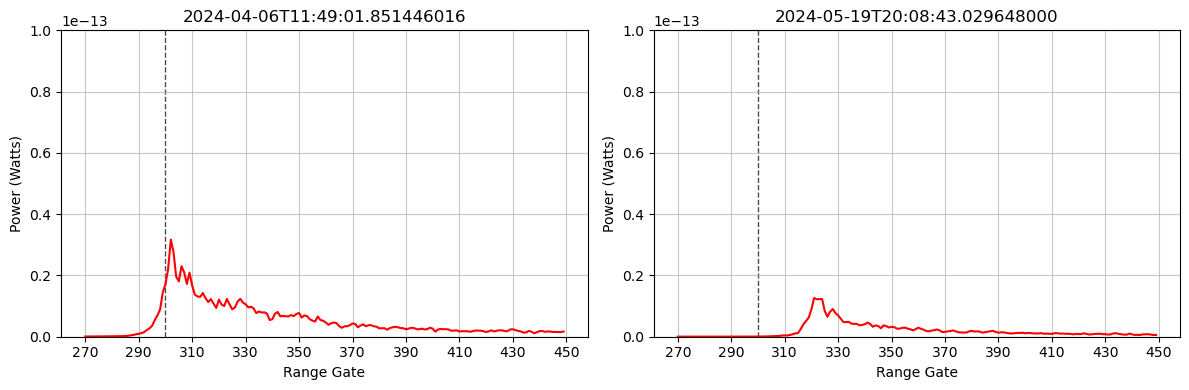

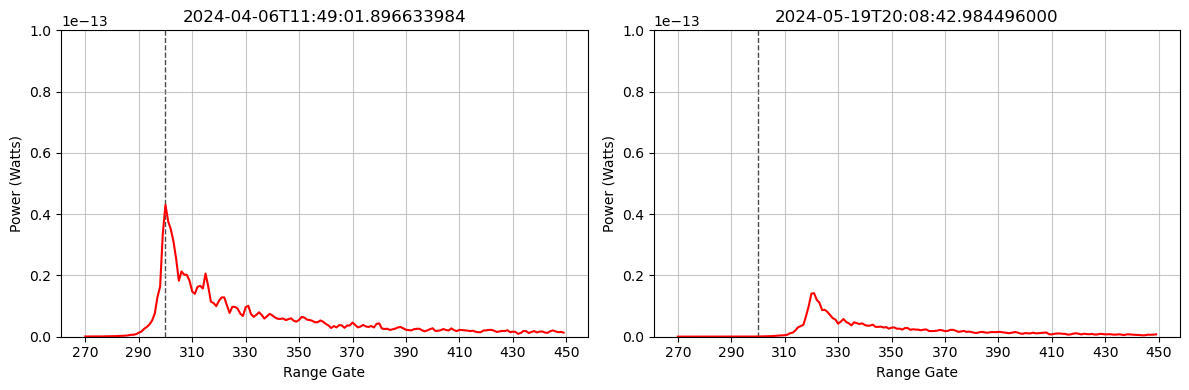

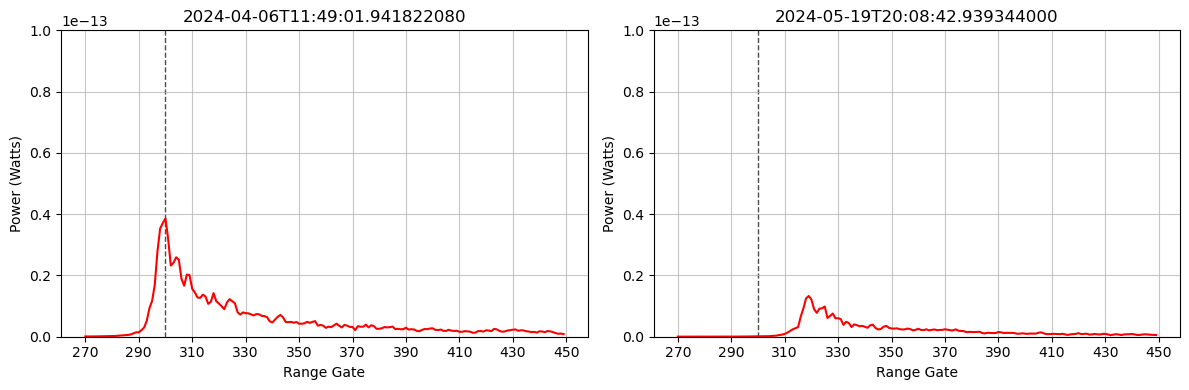

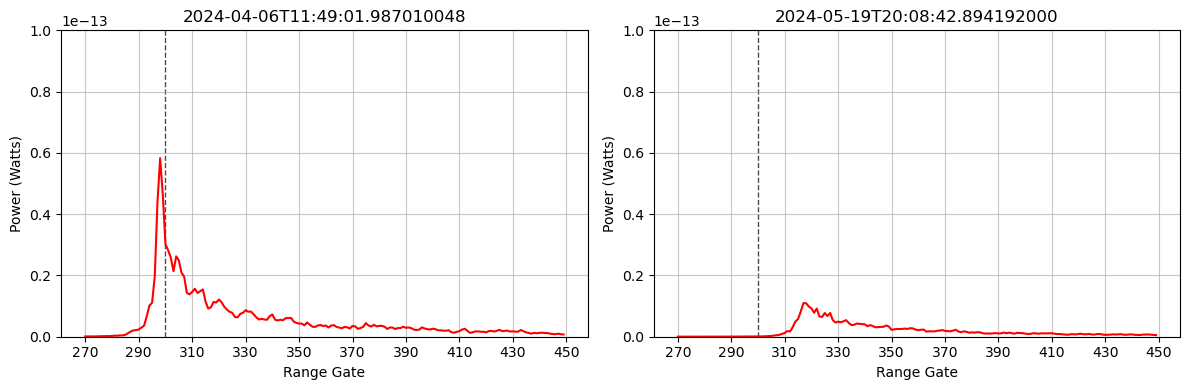

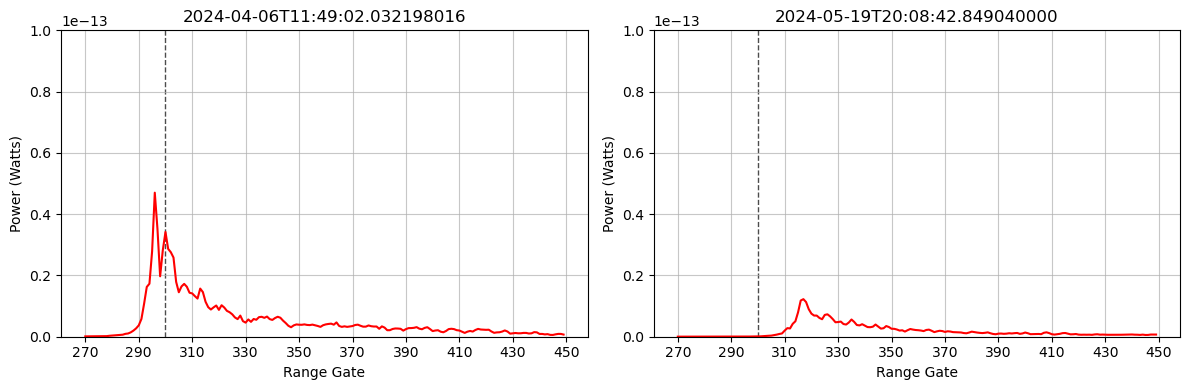

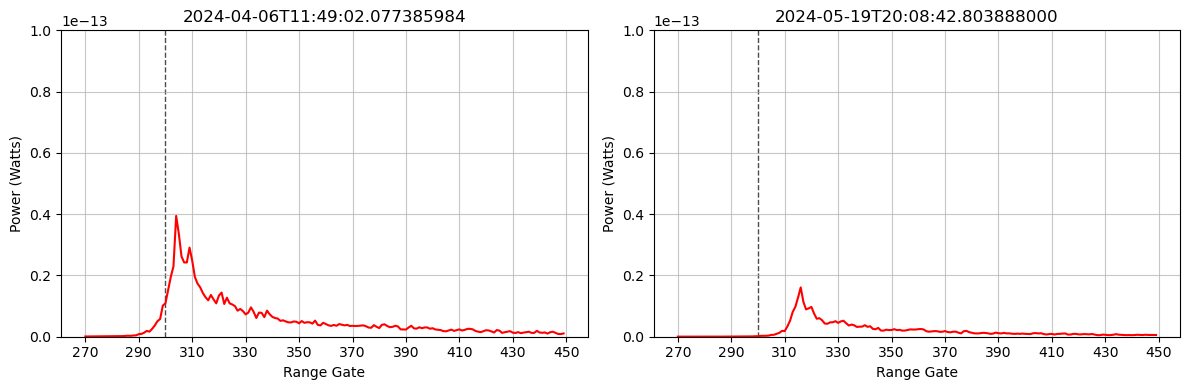

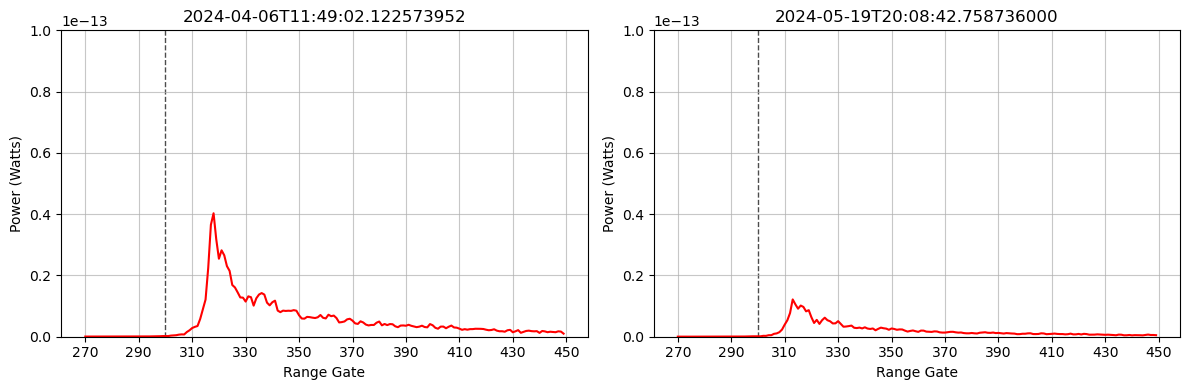

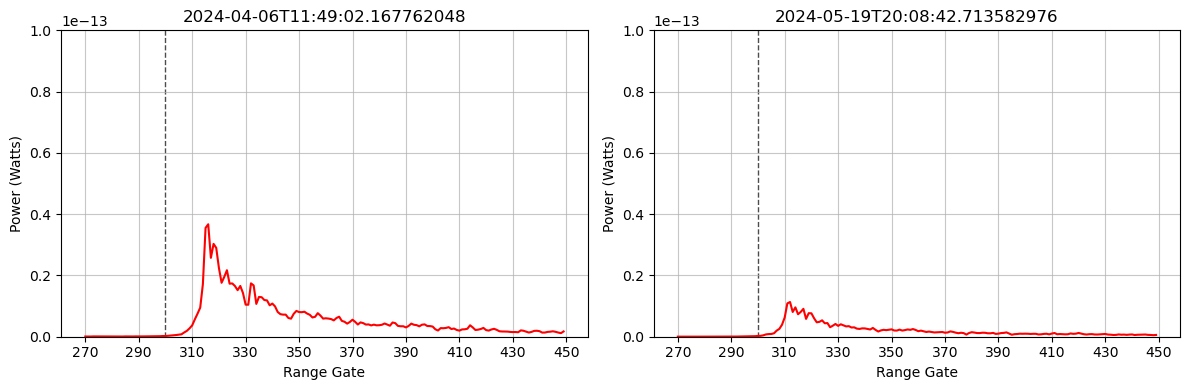

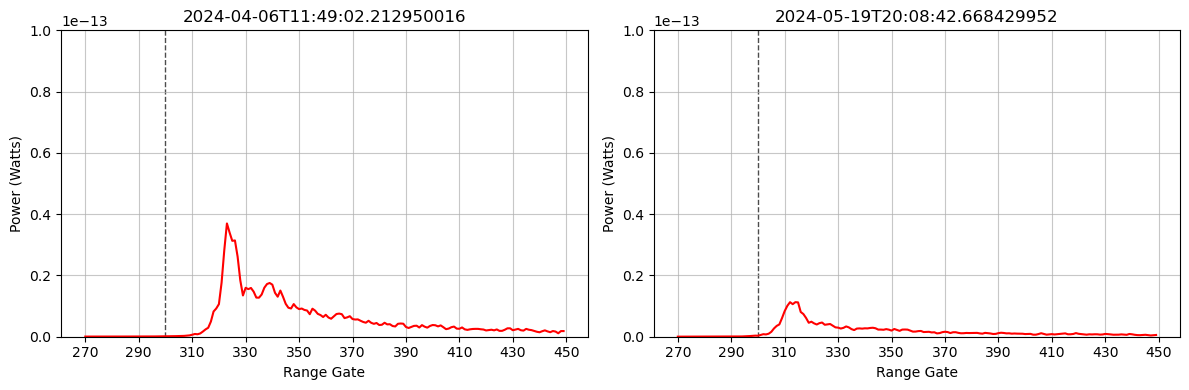

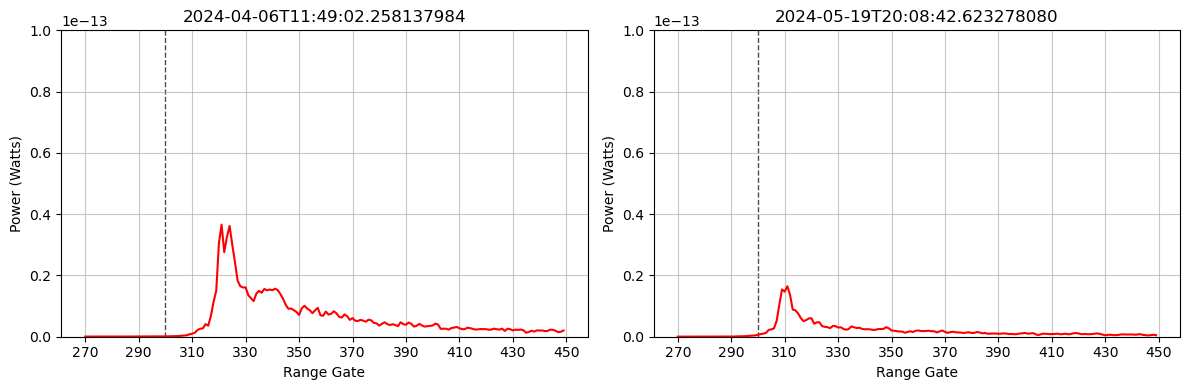

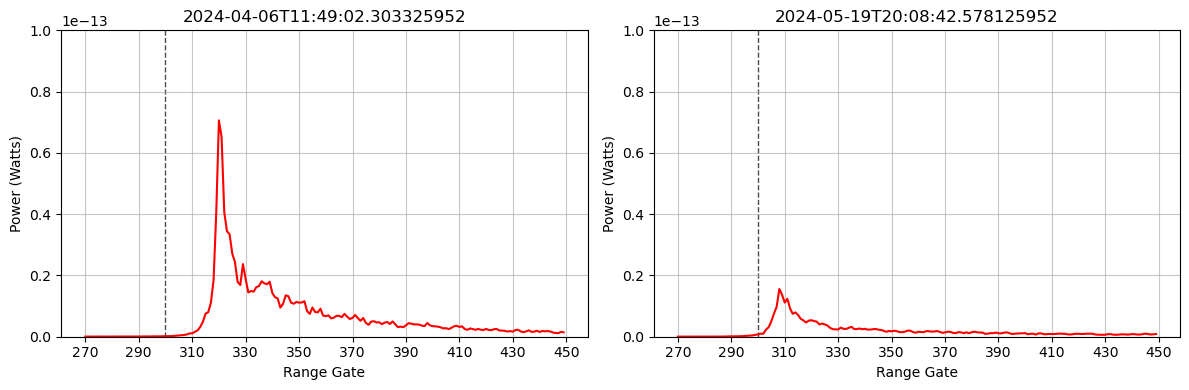

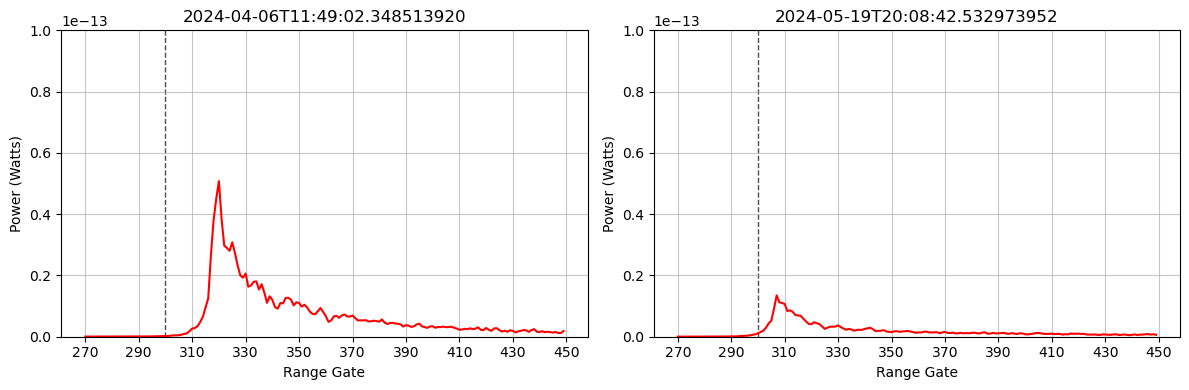

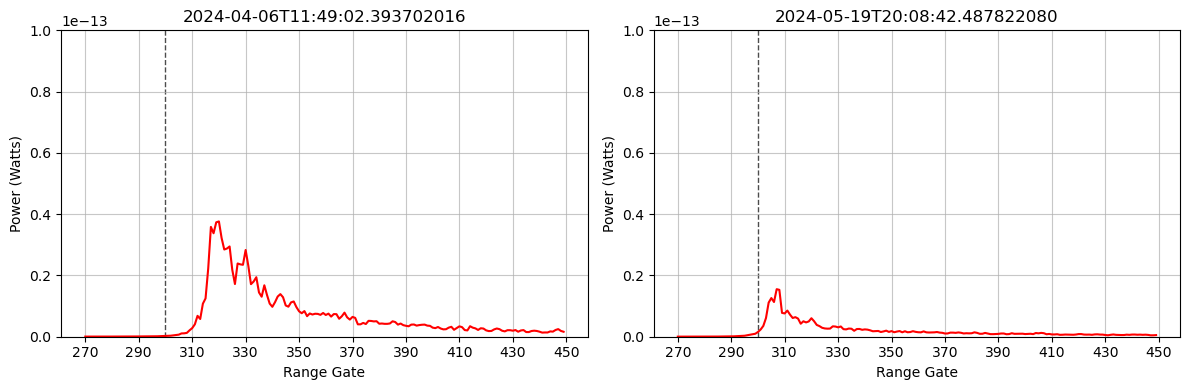

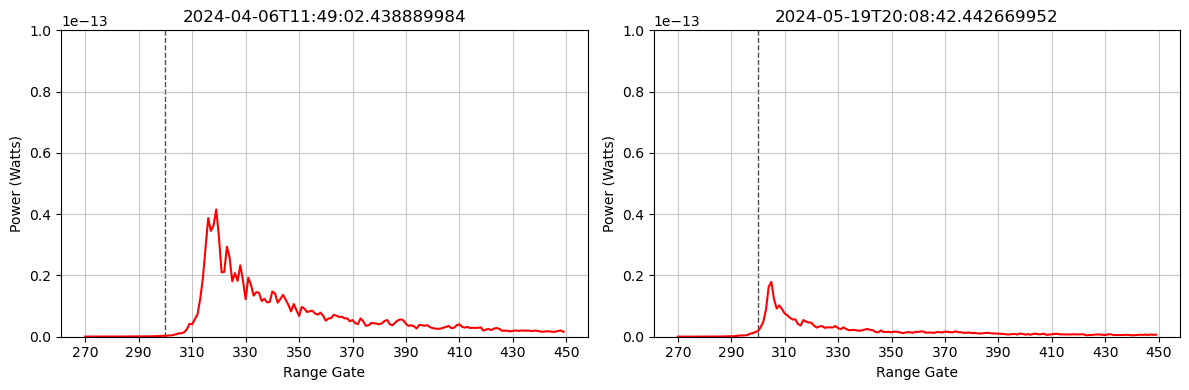

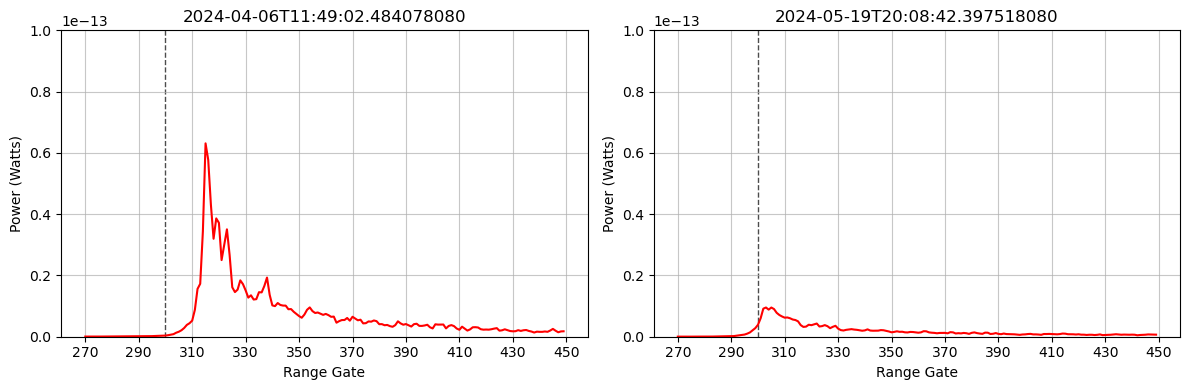

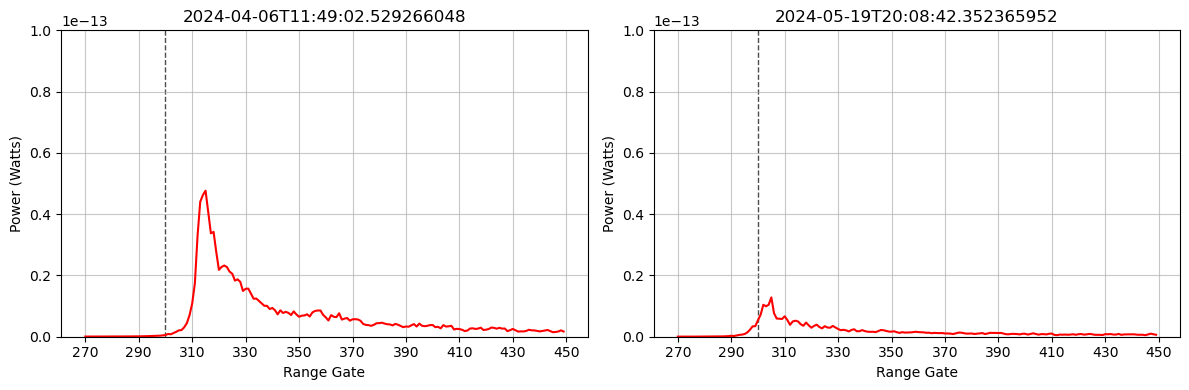

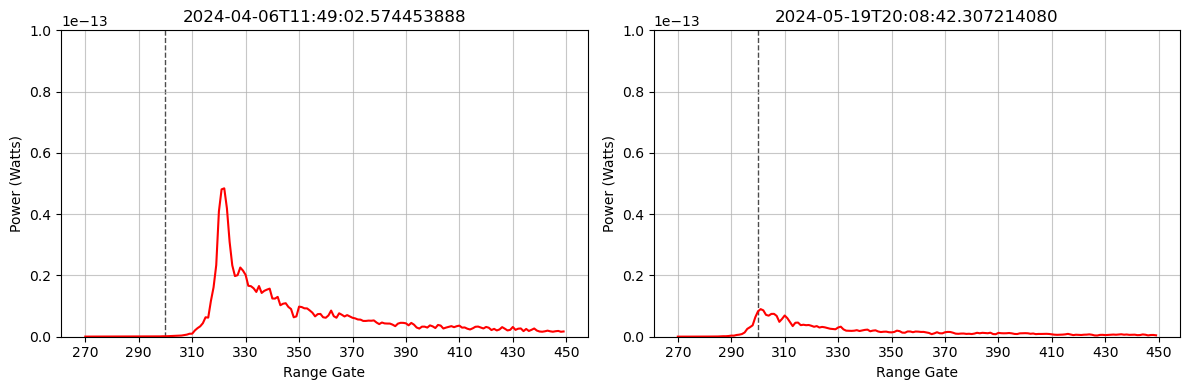

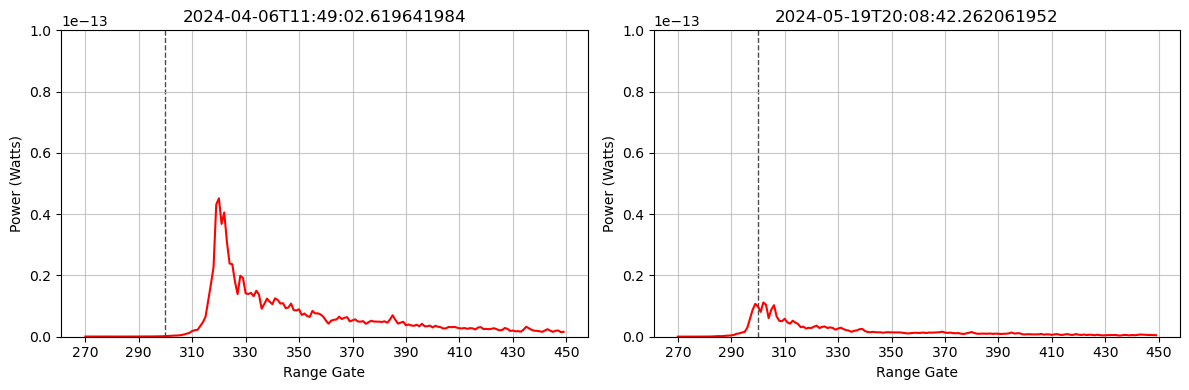

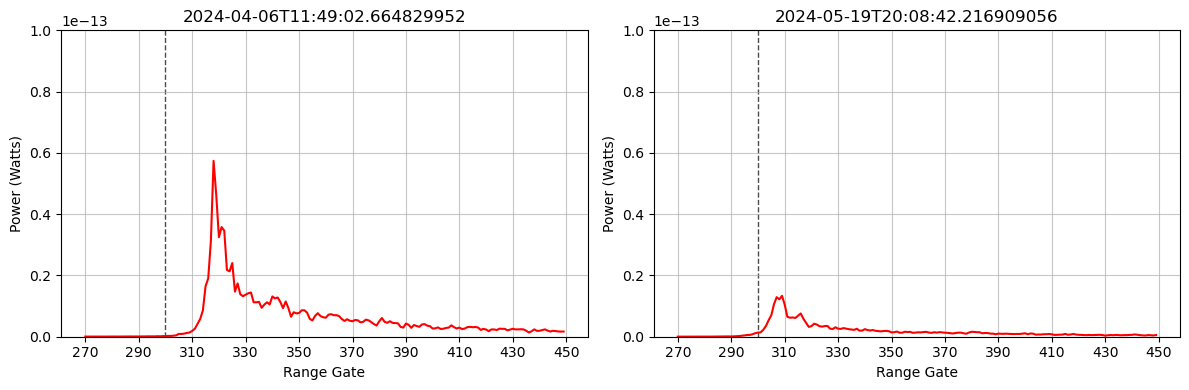

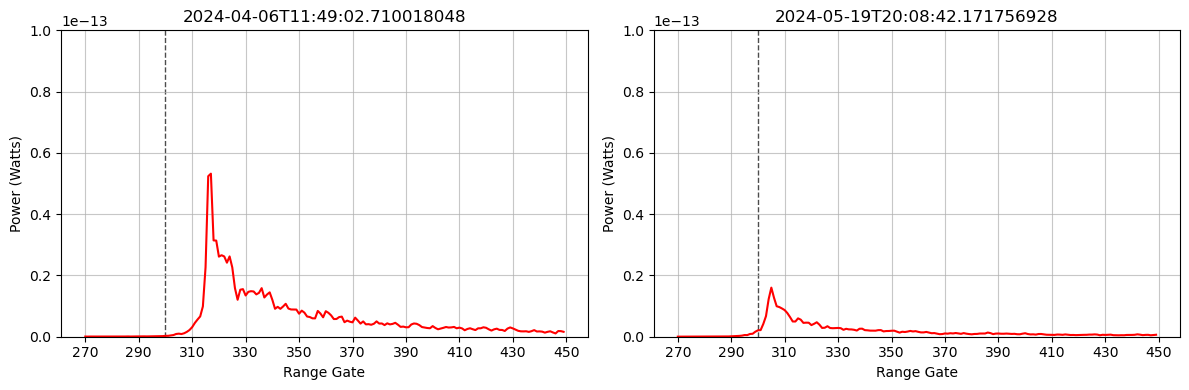

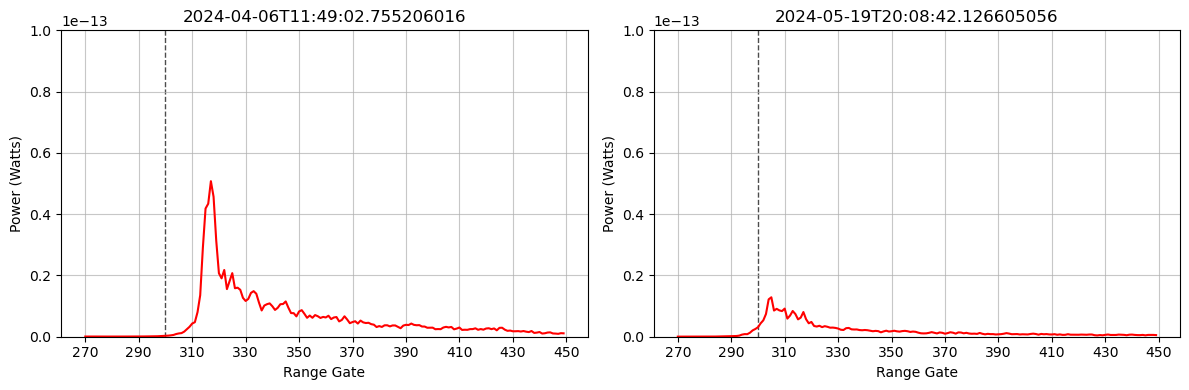

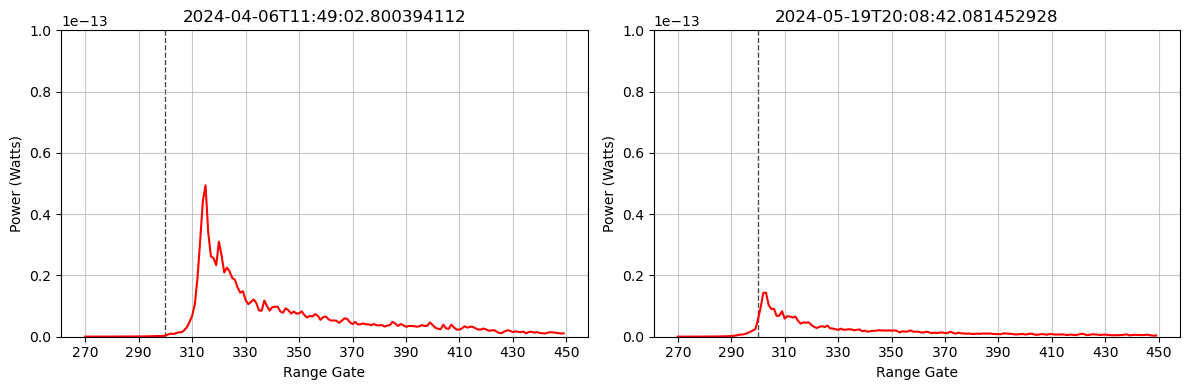

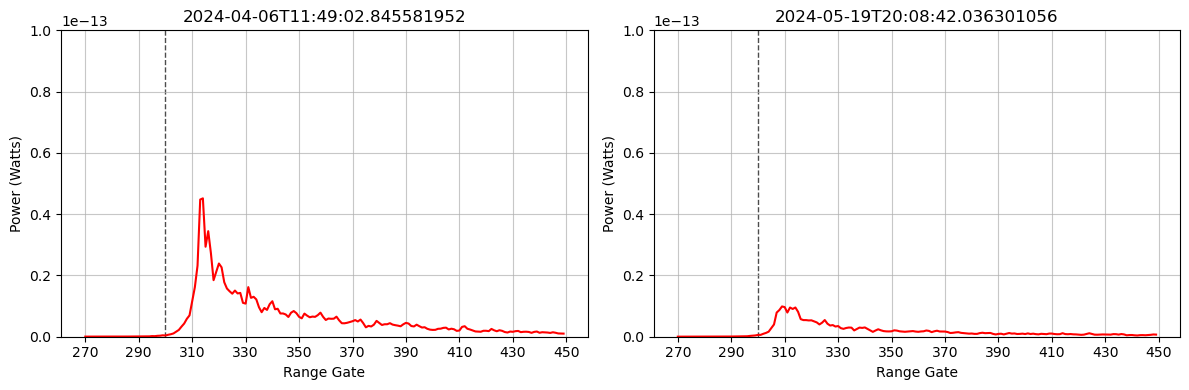

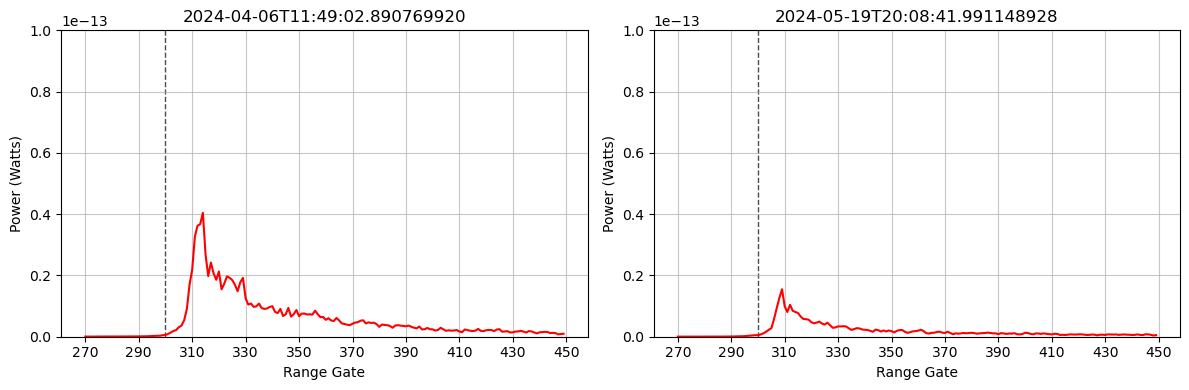

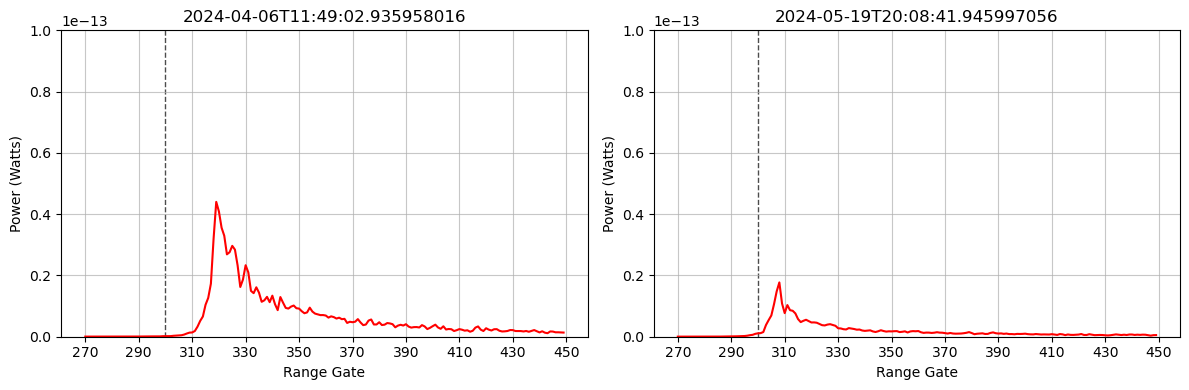

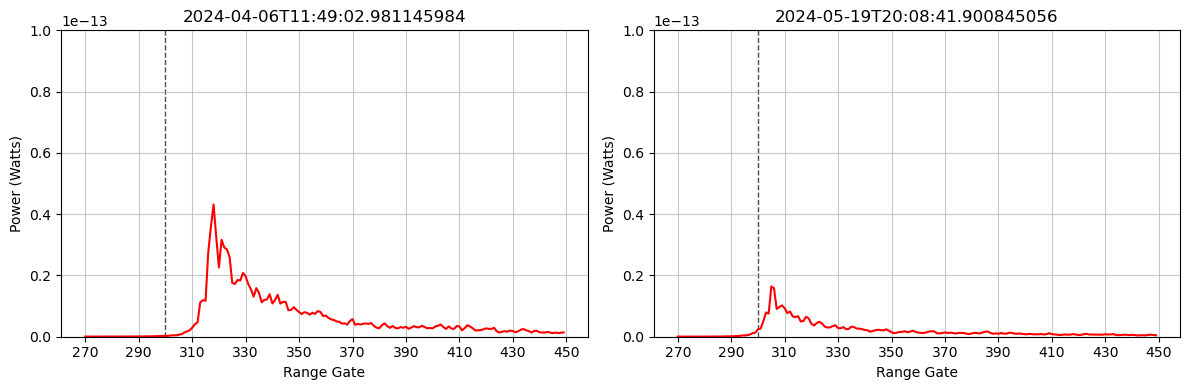

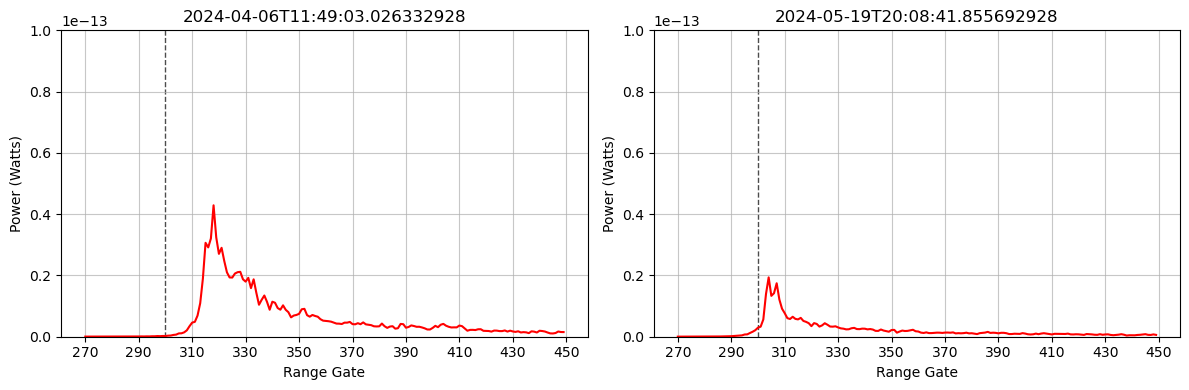

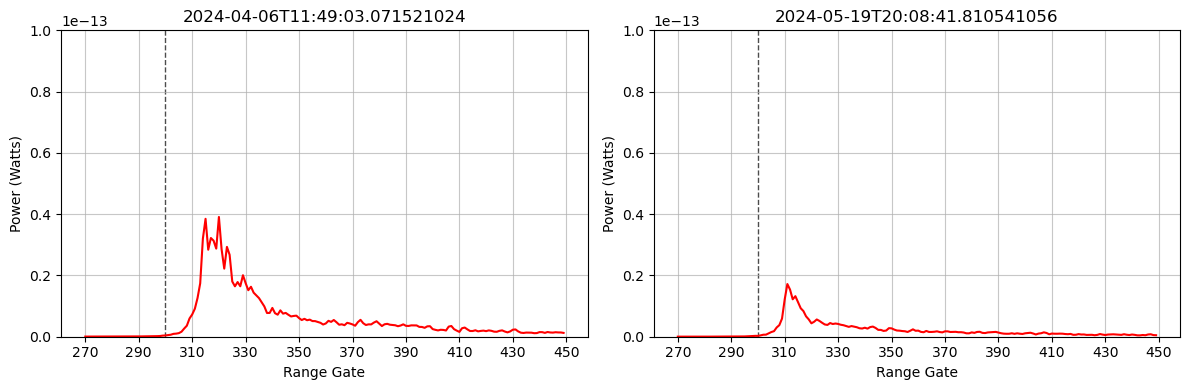

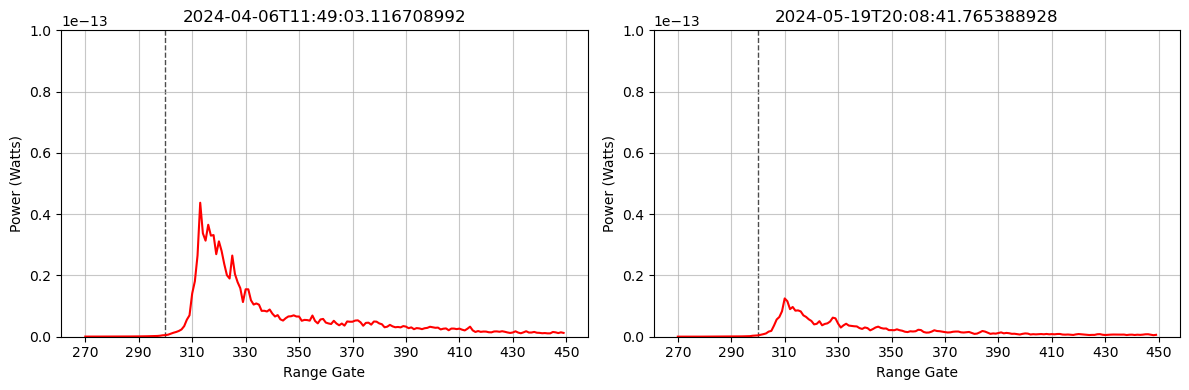

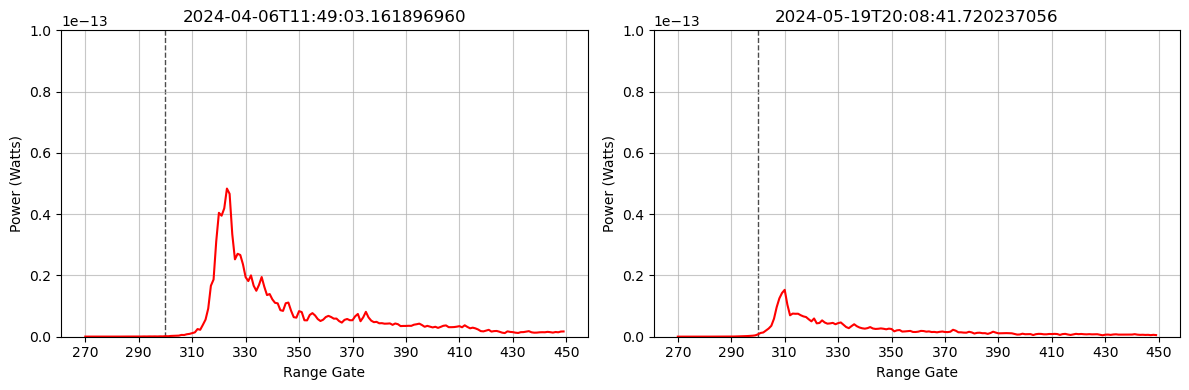

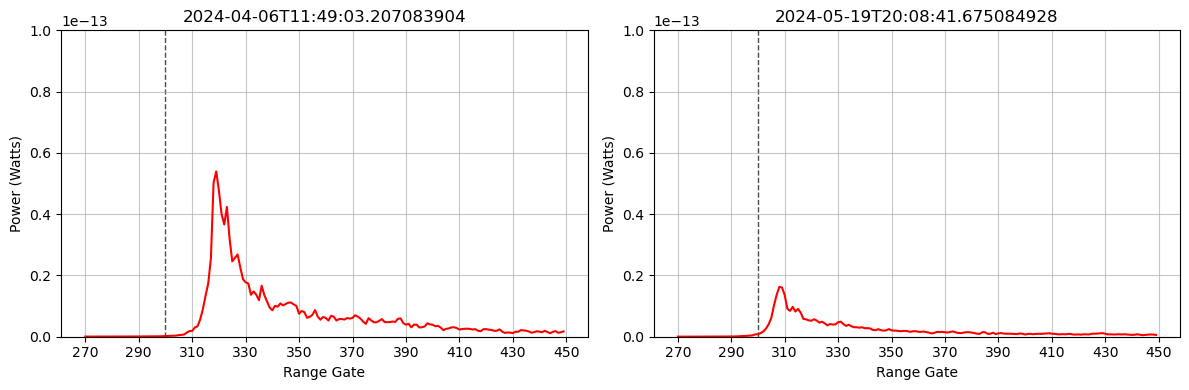

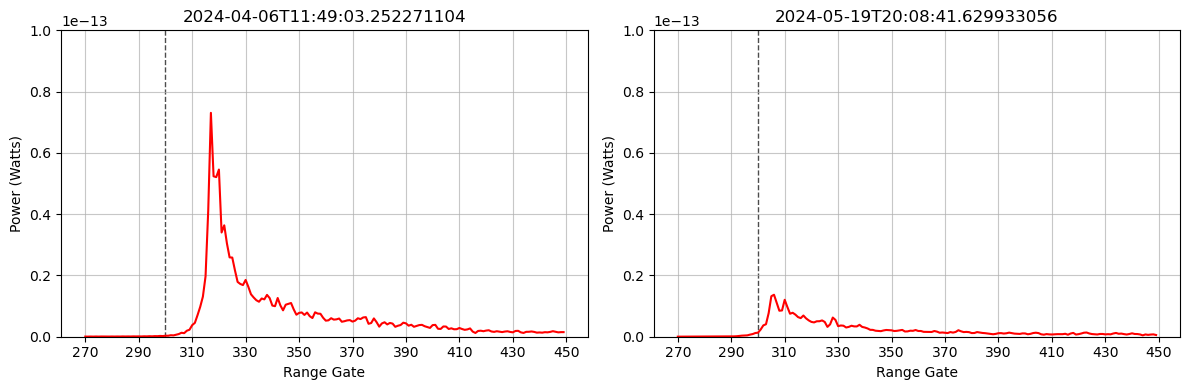

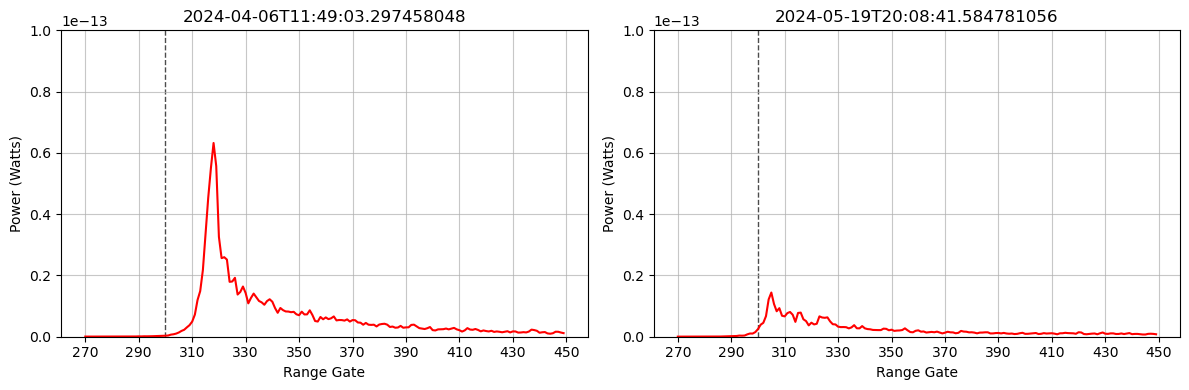

In [276]:
# Thick 
n_to_plot = len(ds1_bbox.rec_count_20_ku)

for i in range(n_to_plot):
    j = n_to_plot - i - 1
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450, ylim = 1e-13, ax=axes[0])
    plot_wfm(ds2_bbox, j, bin_start=270, bin_end=450, ylim = 1e-13, ax=axes[1])
    plt.savefig(f"wfm_fig{i}.png")


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\223656889.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


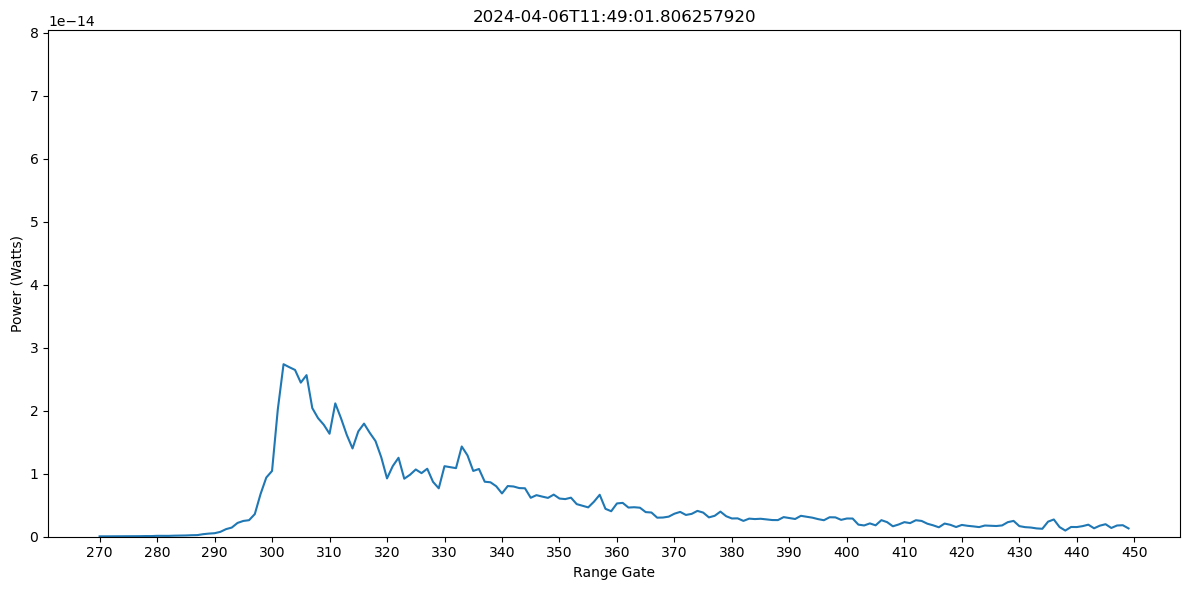

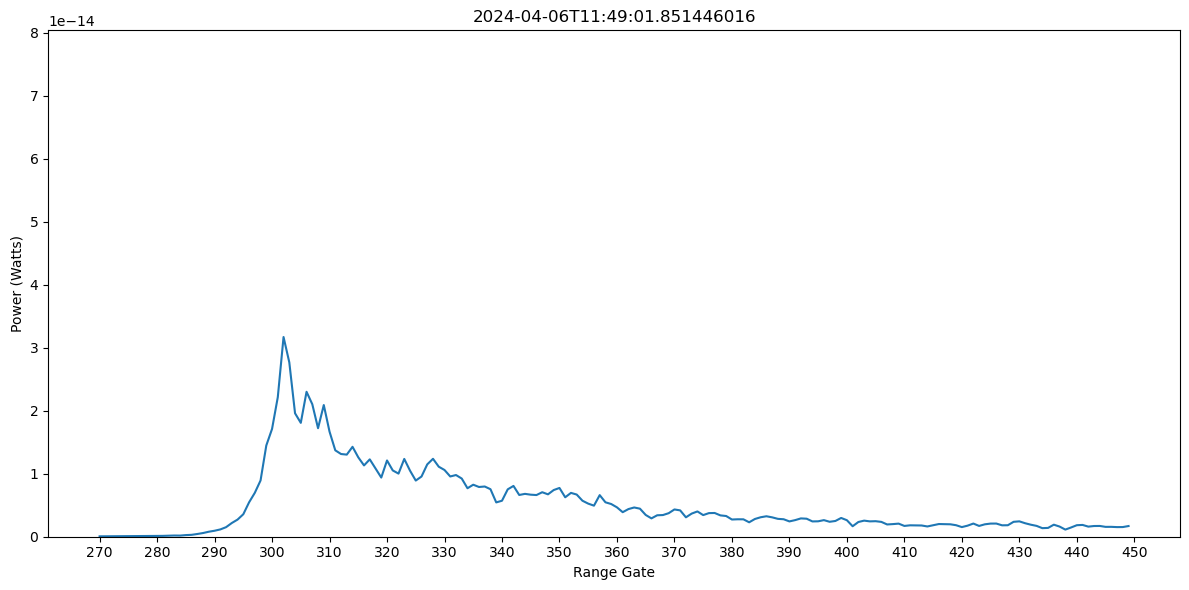

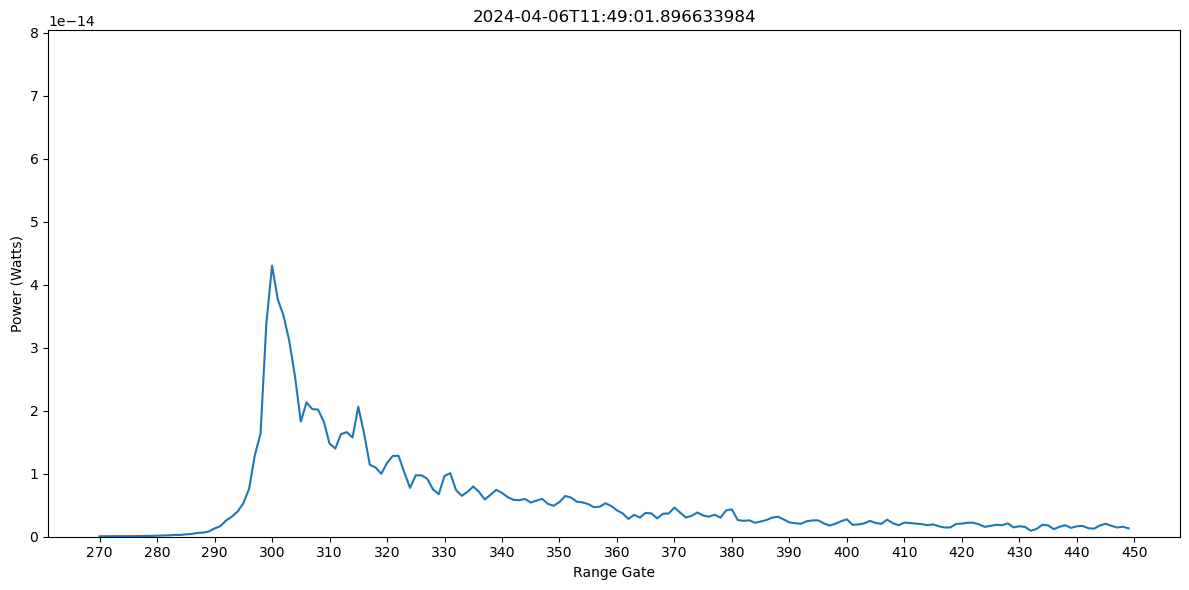

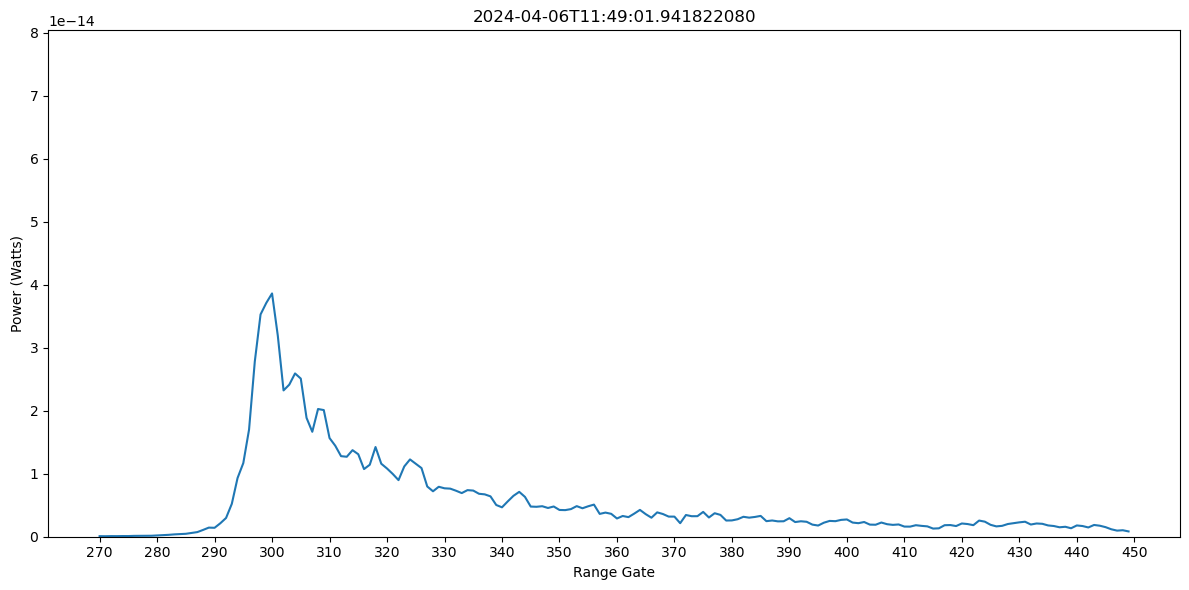

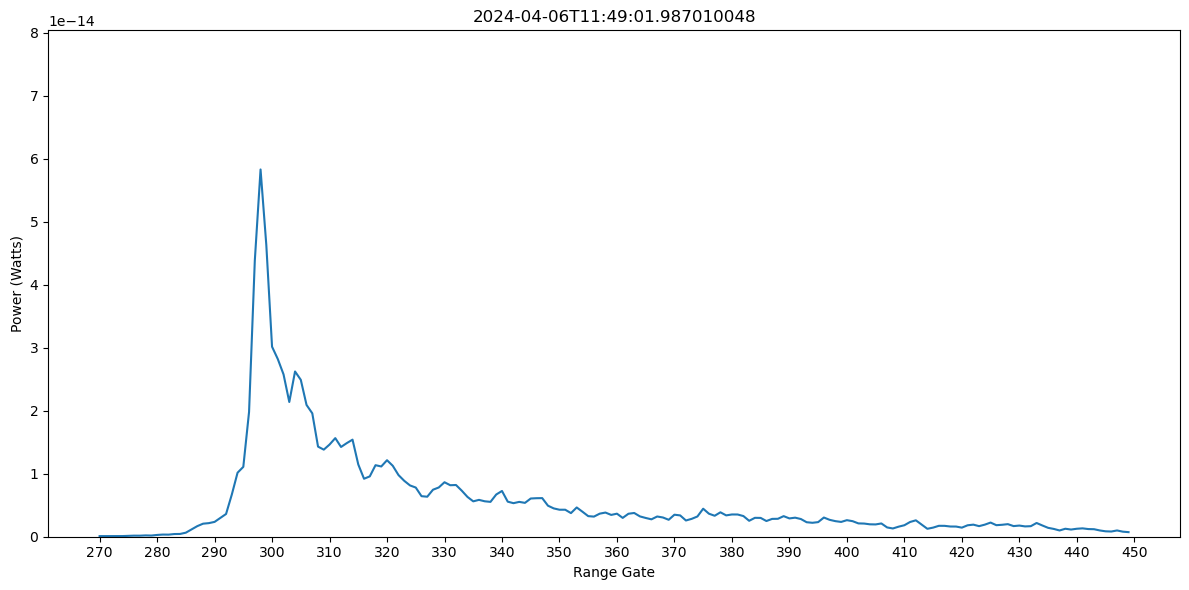

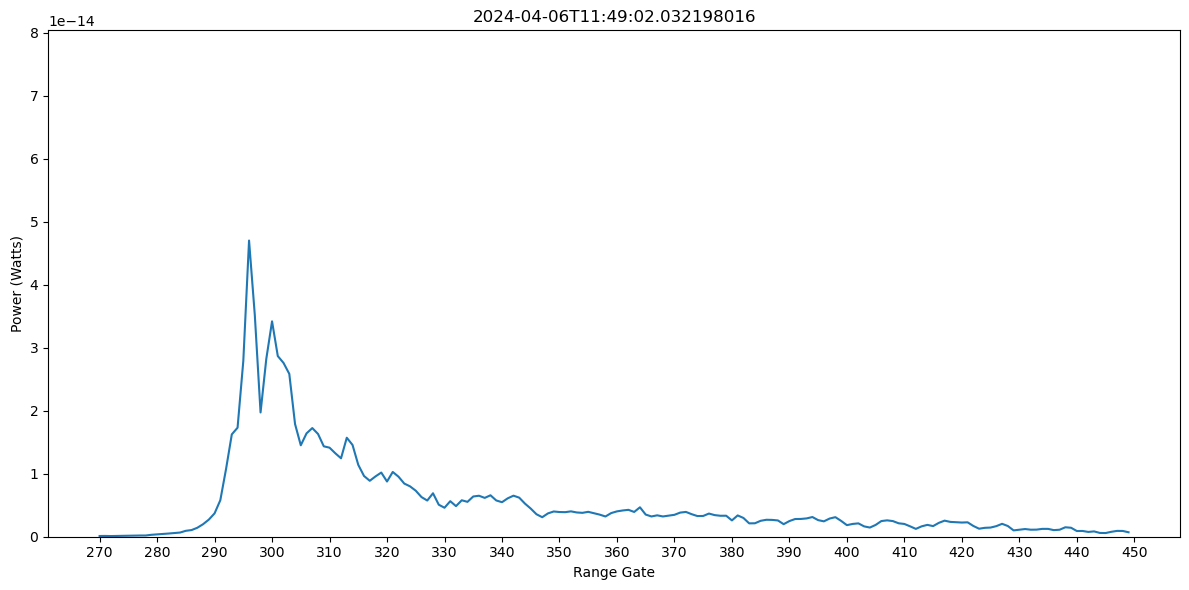

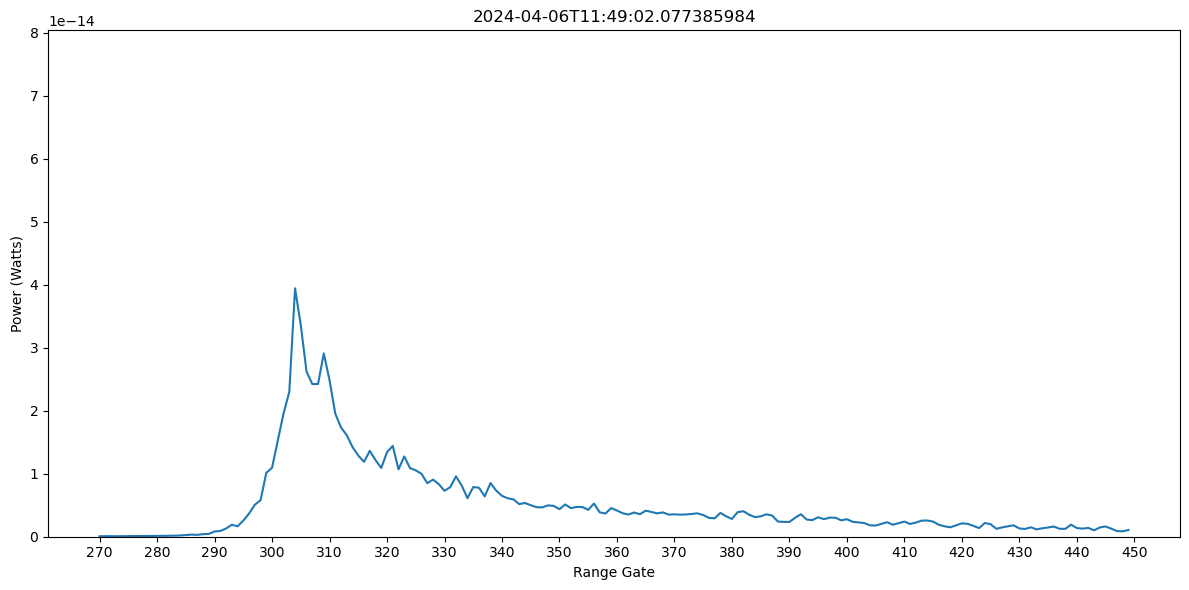

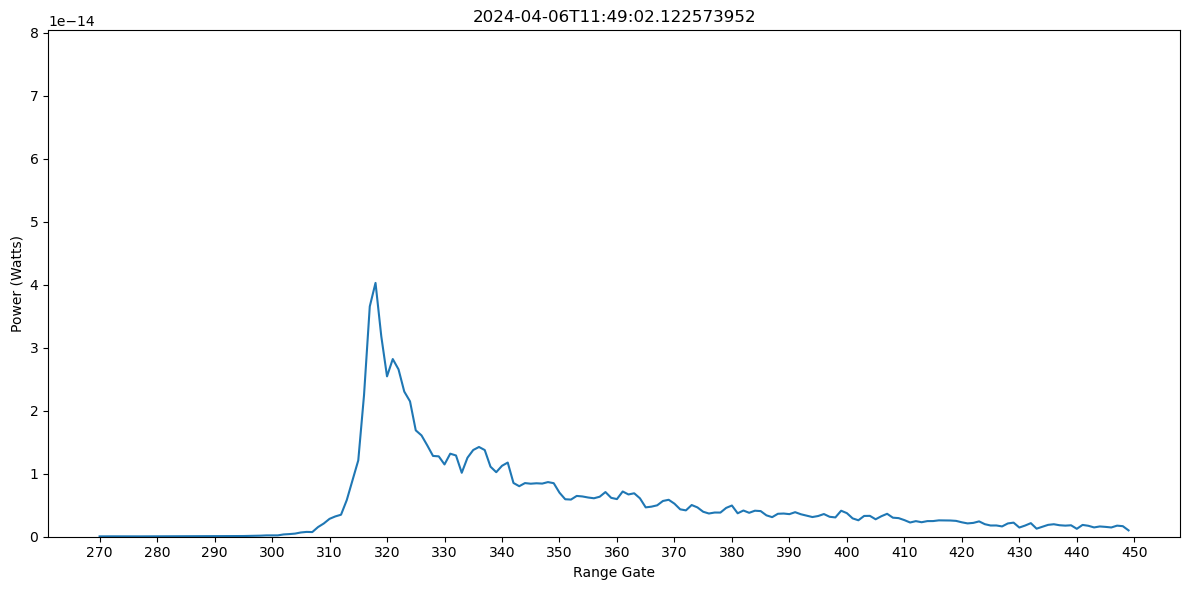

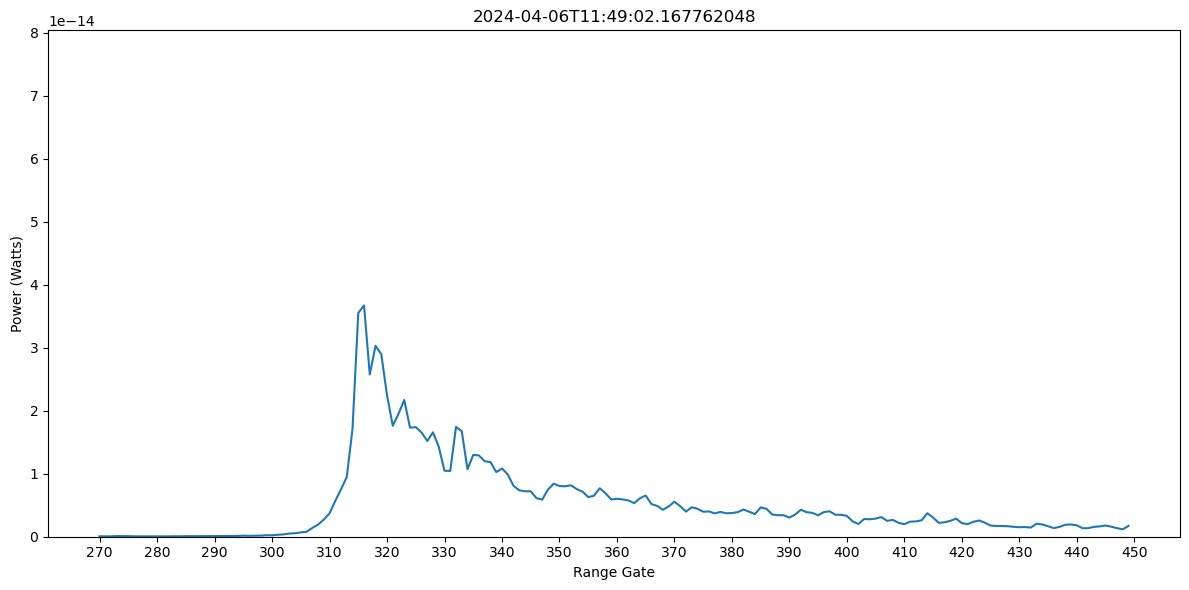

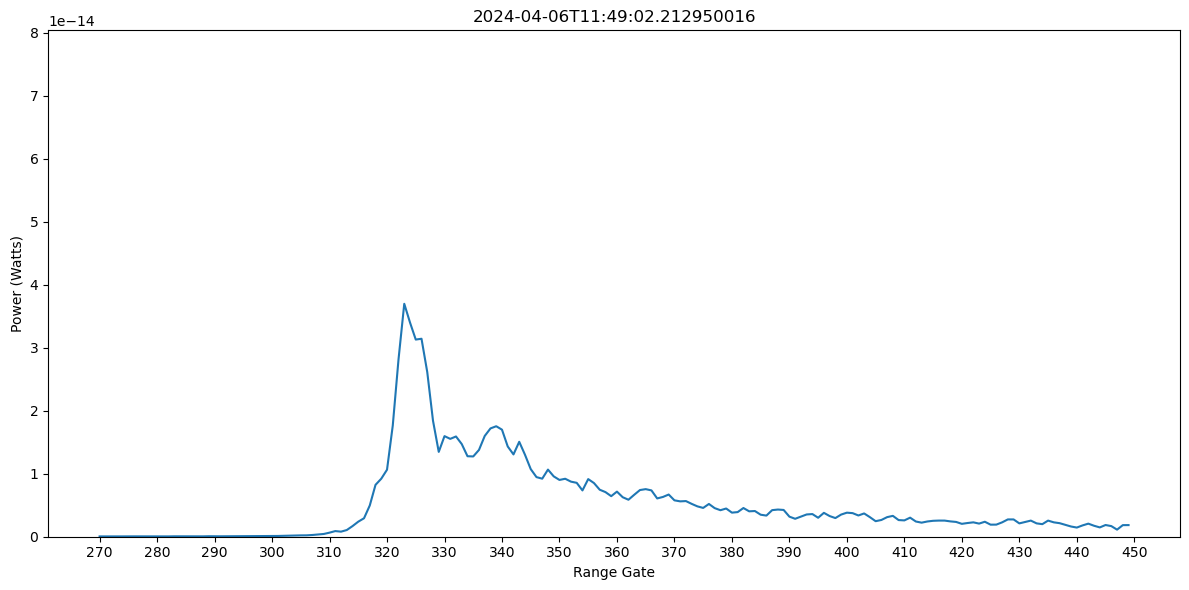

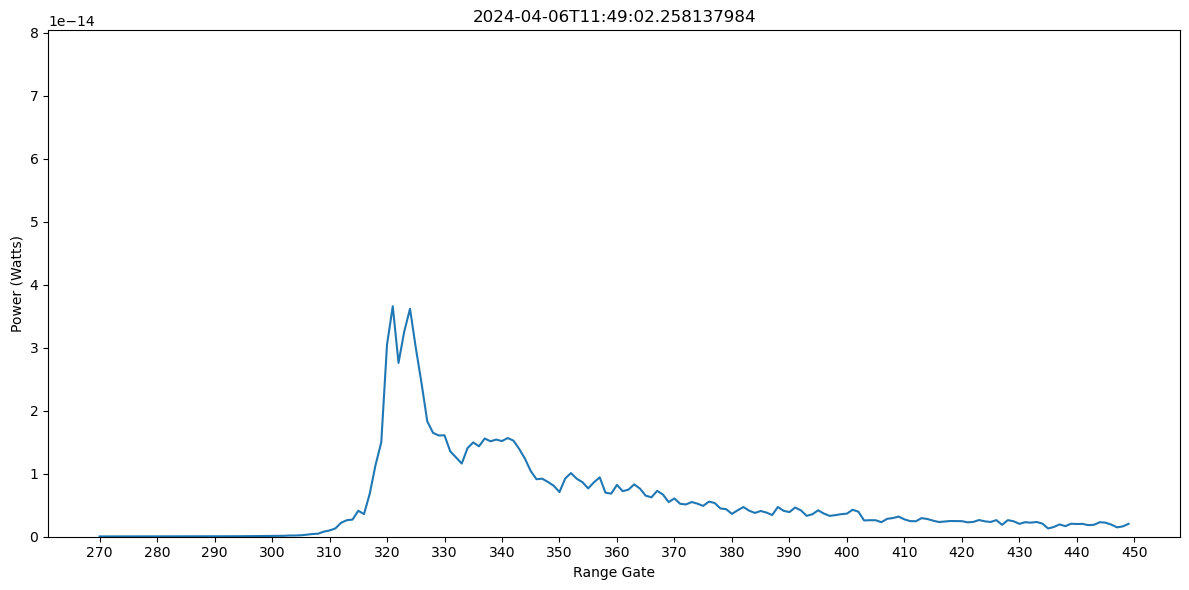

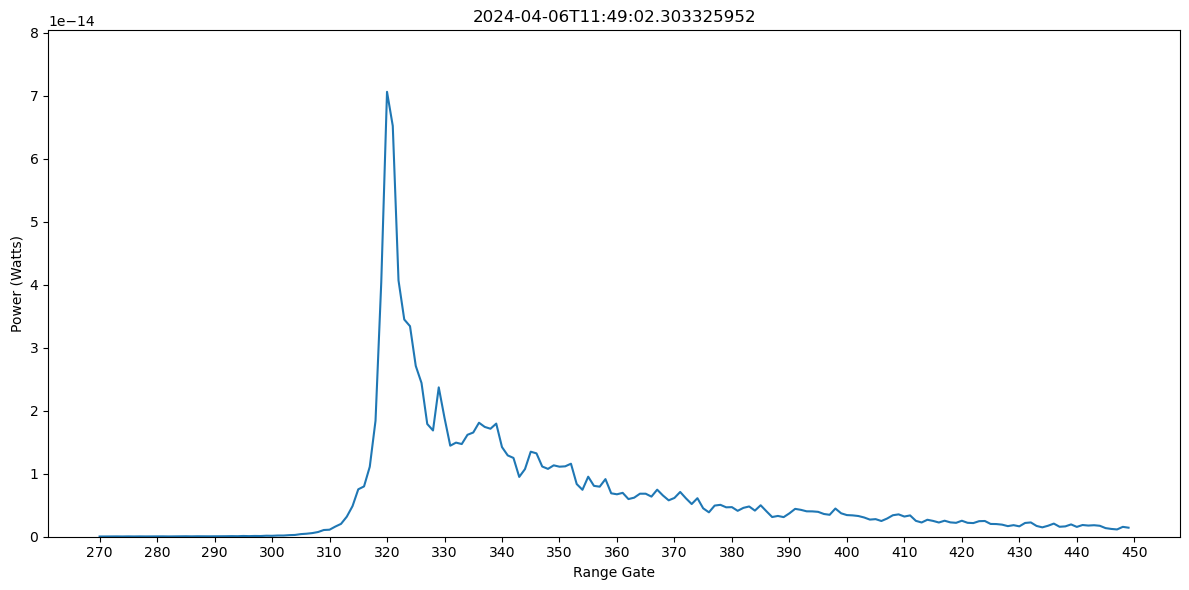

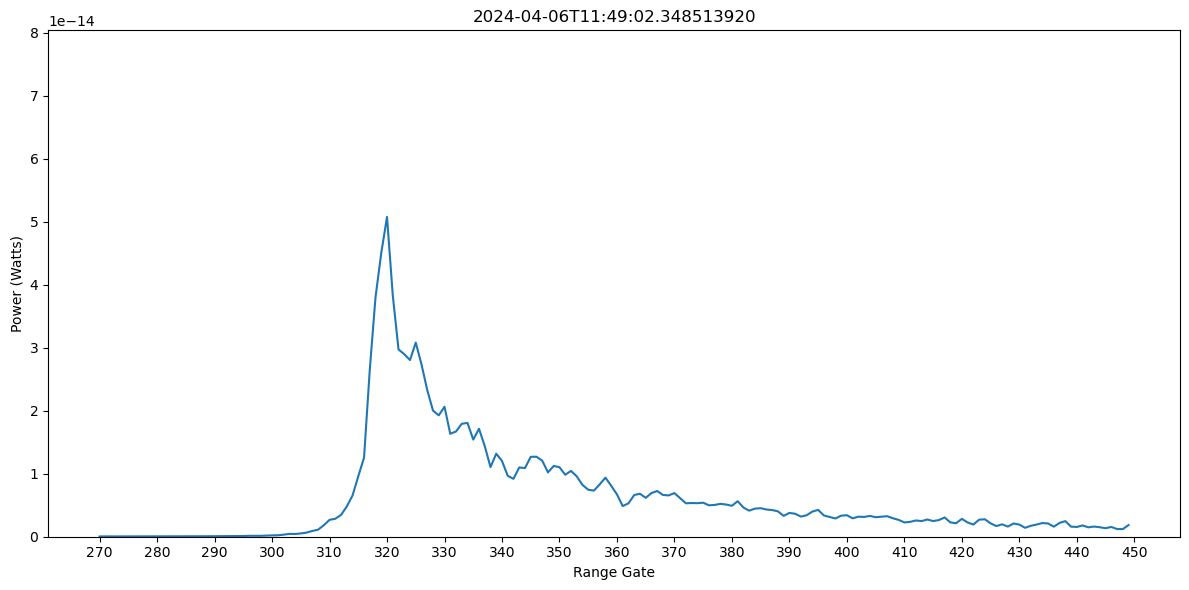

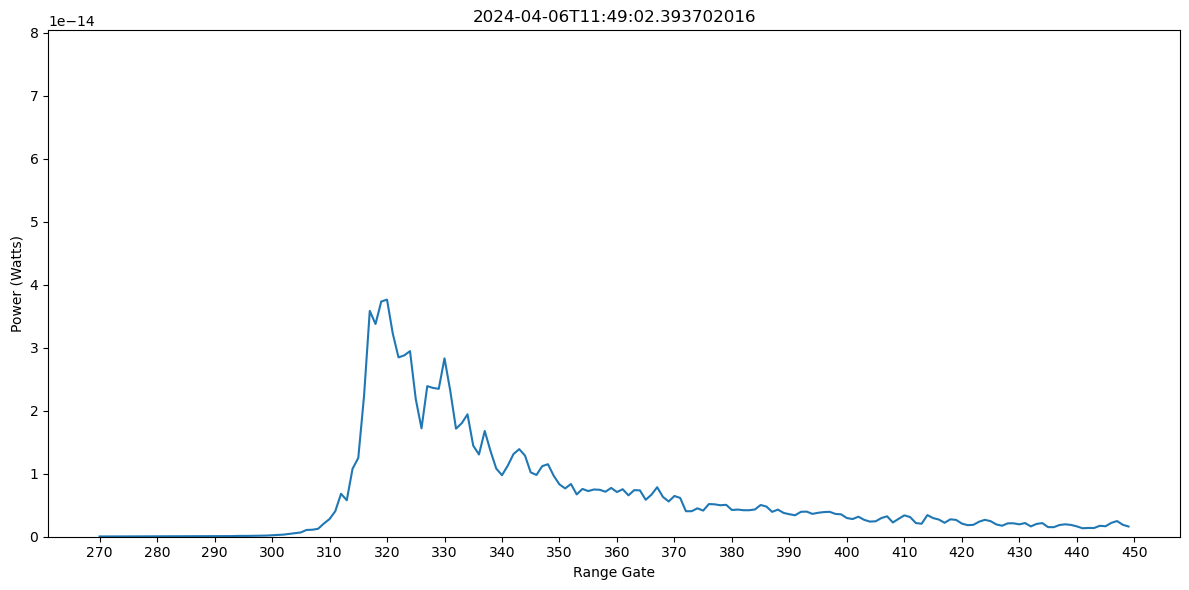

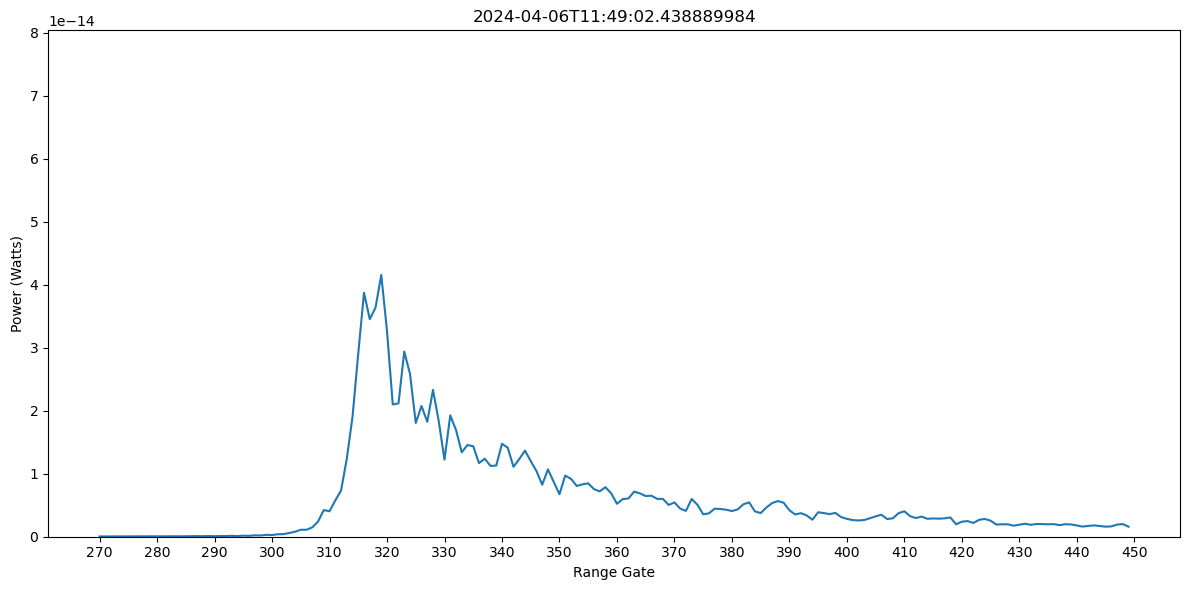

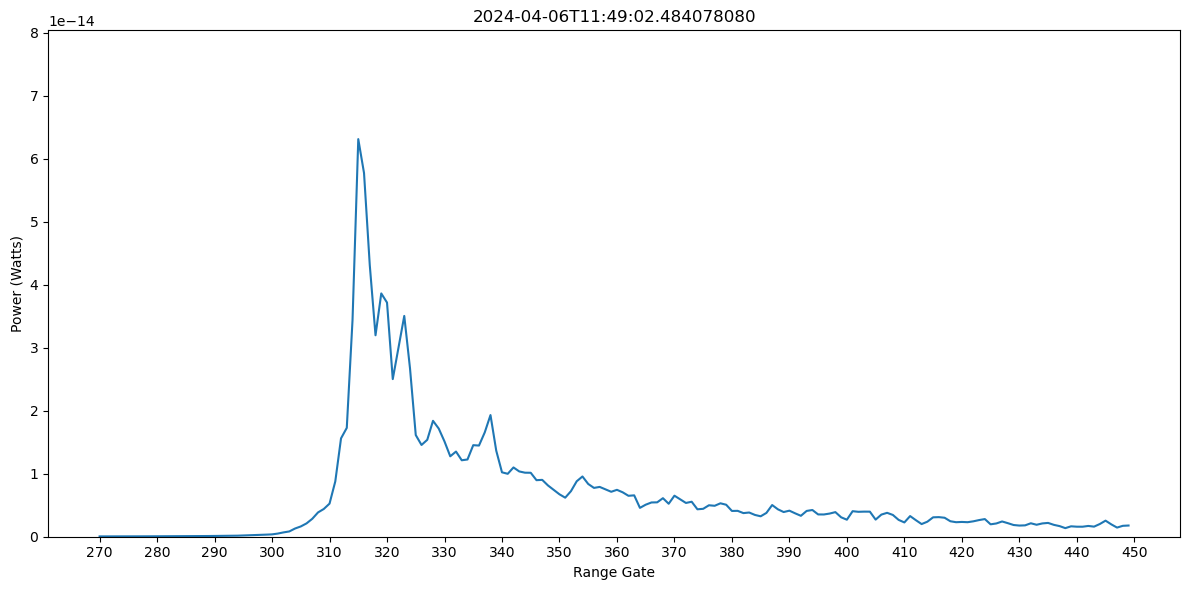

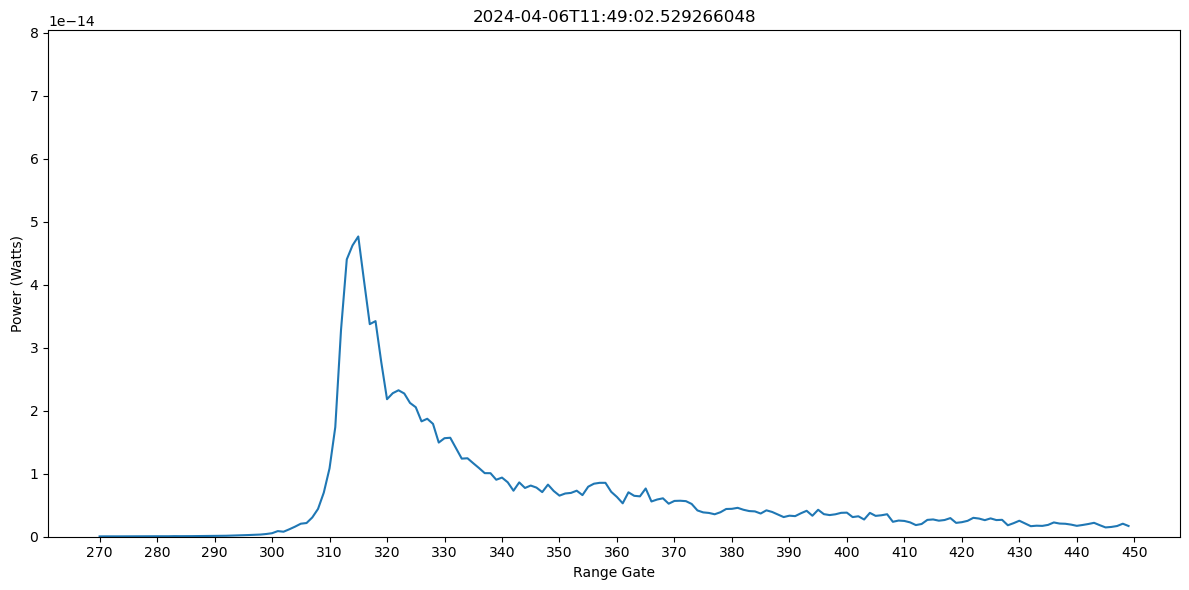

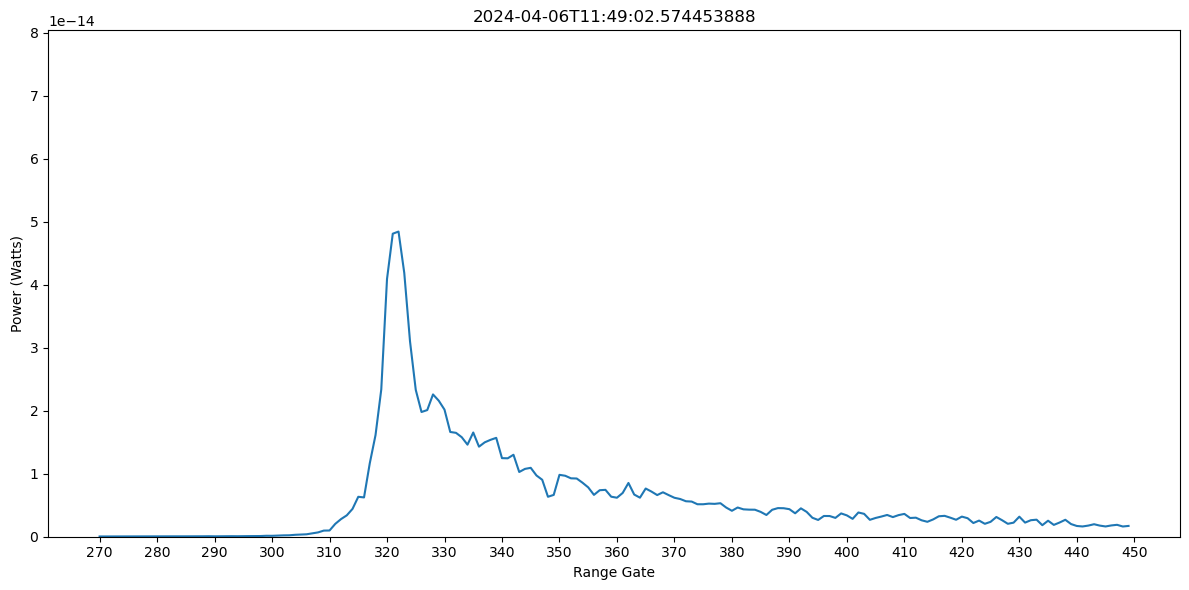

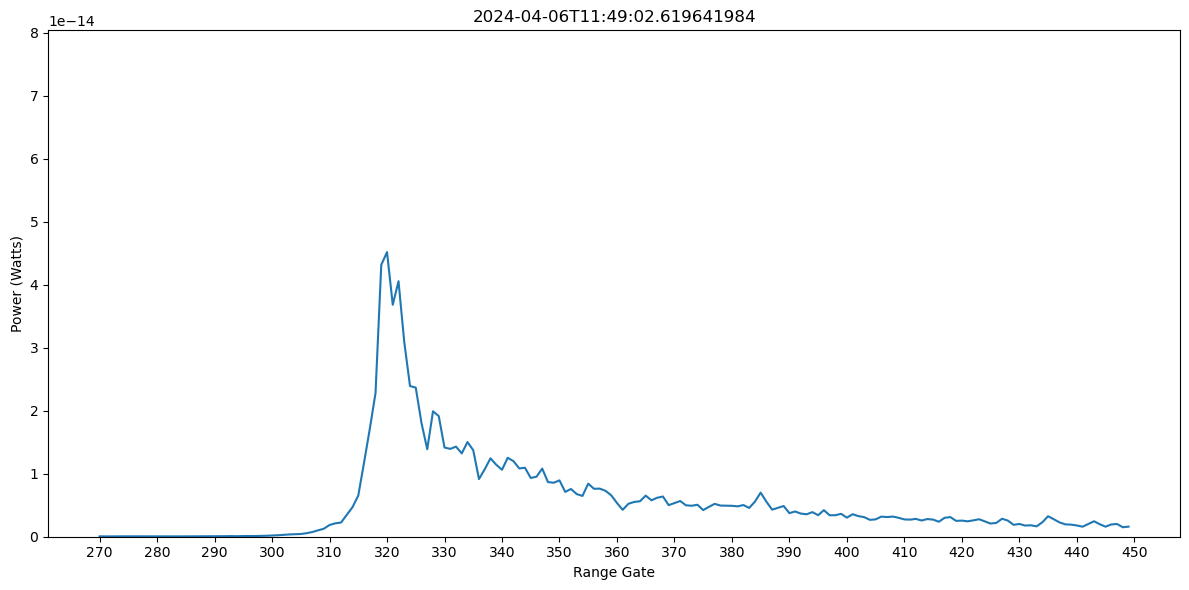

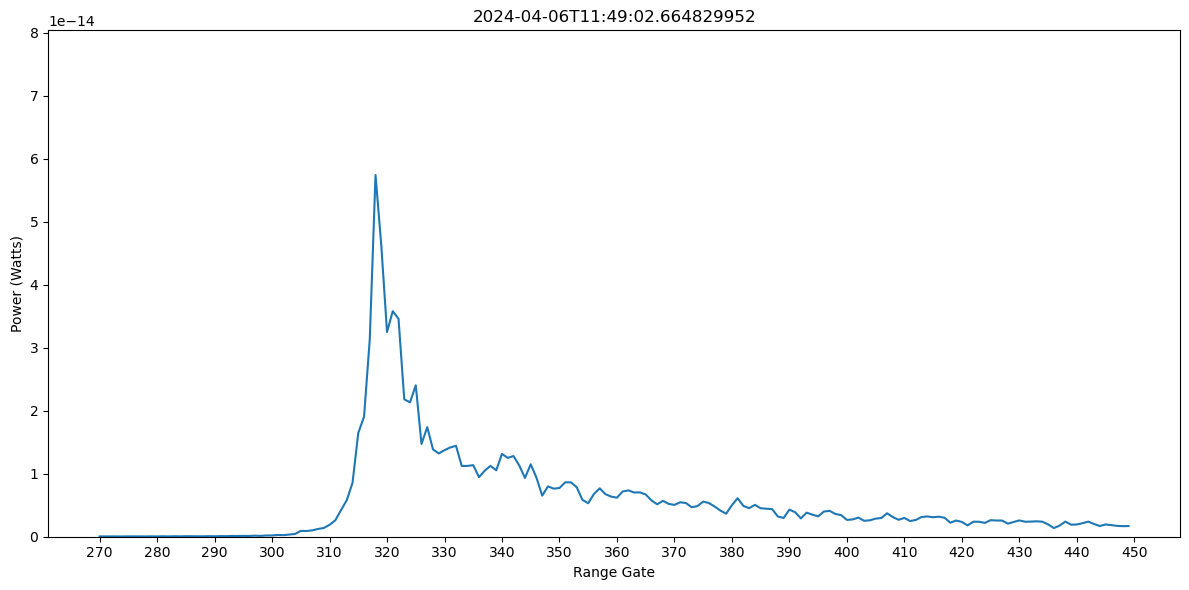

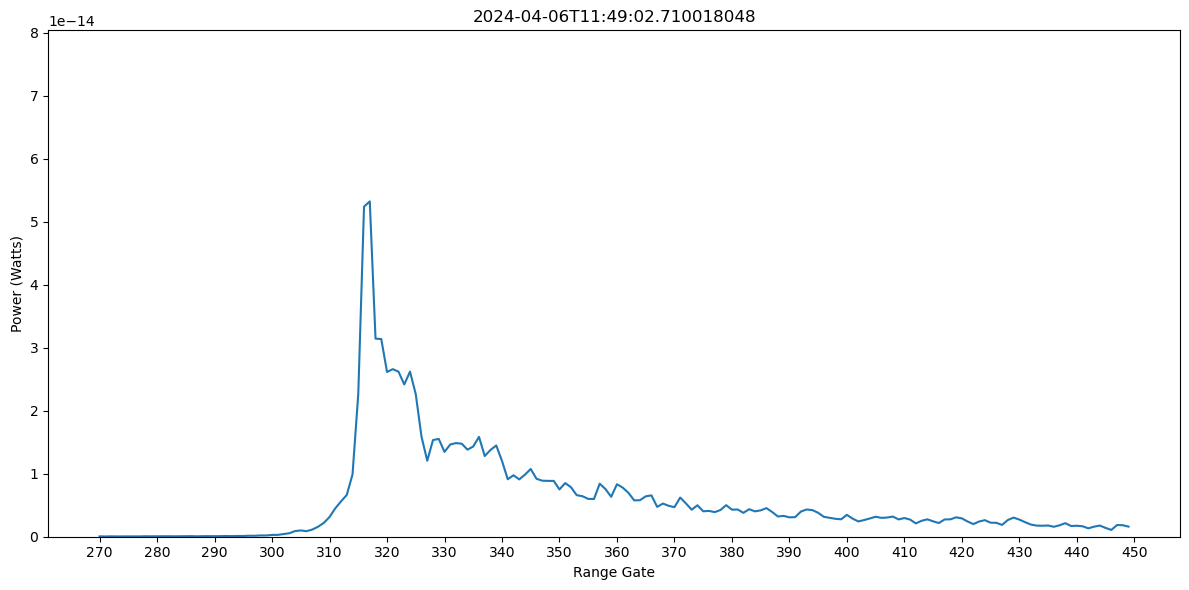

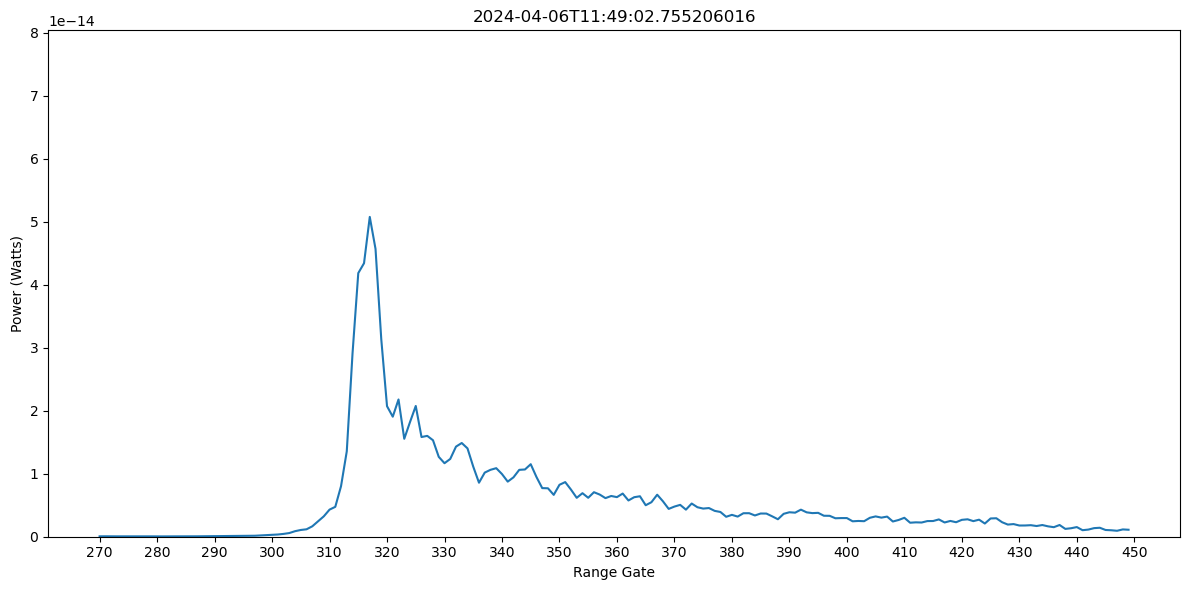

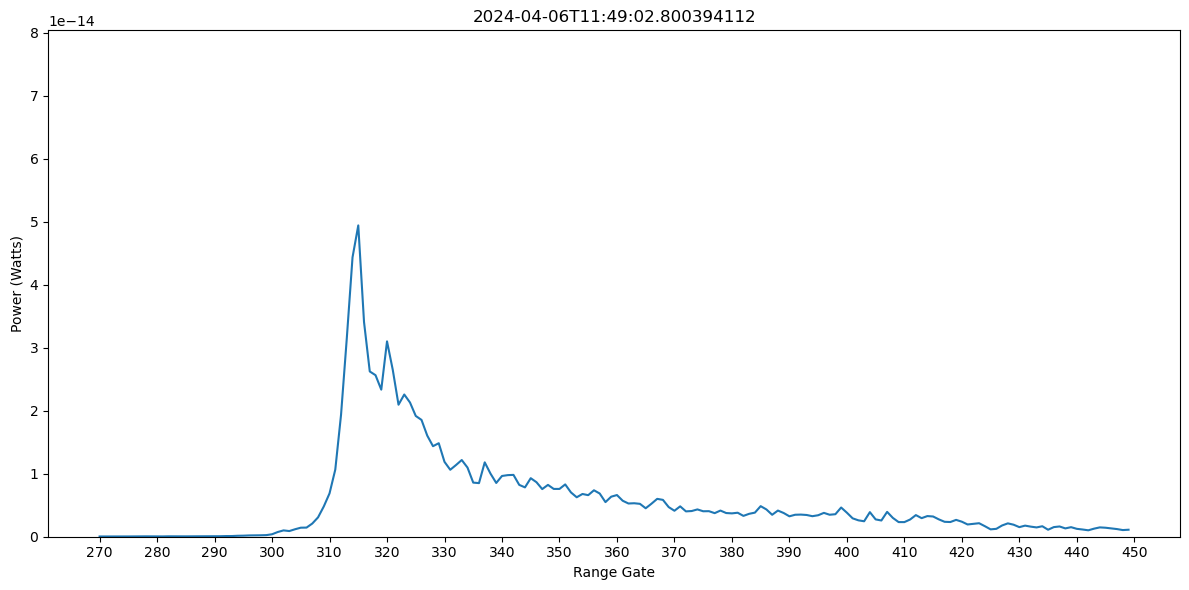

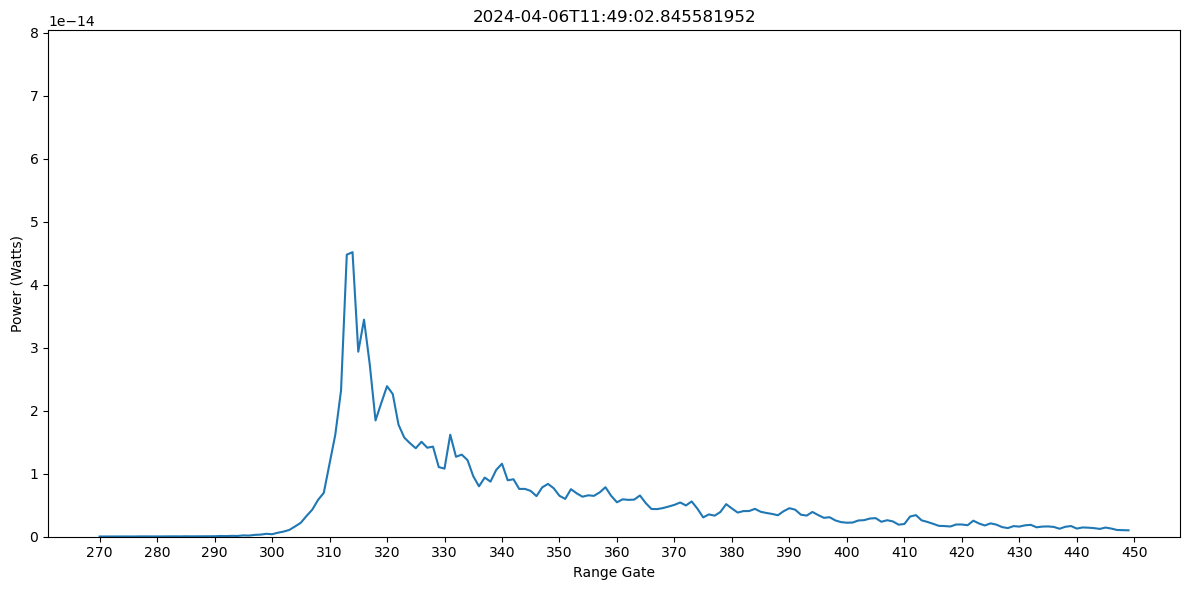

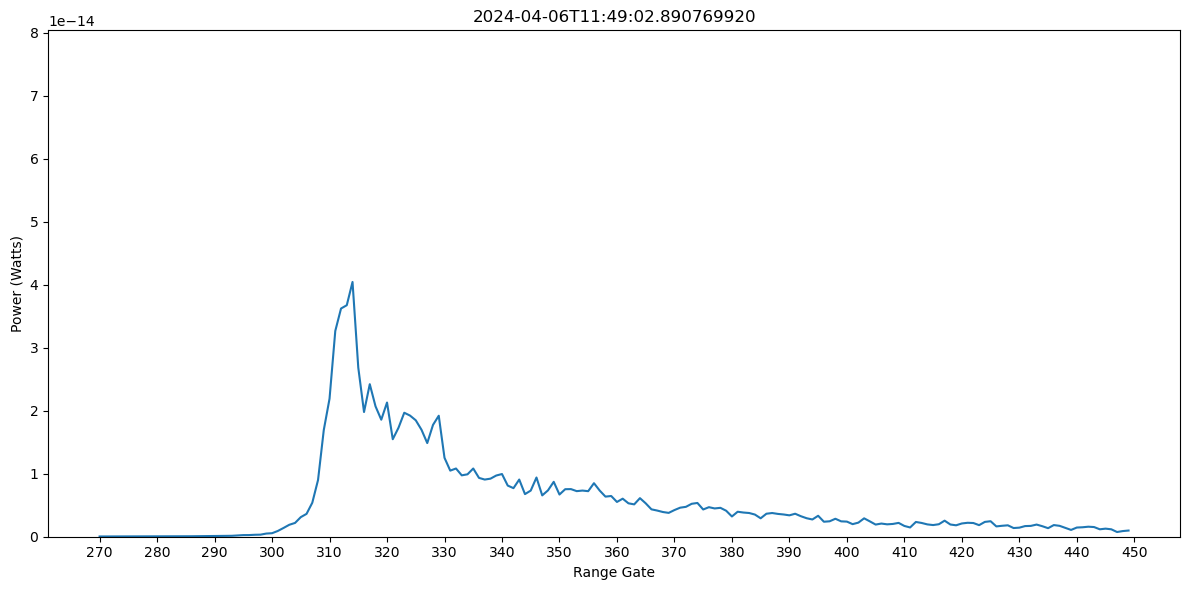

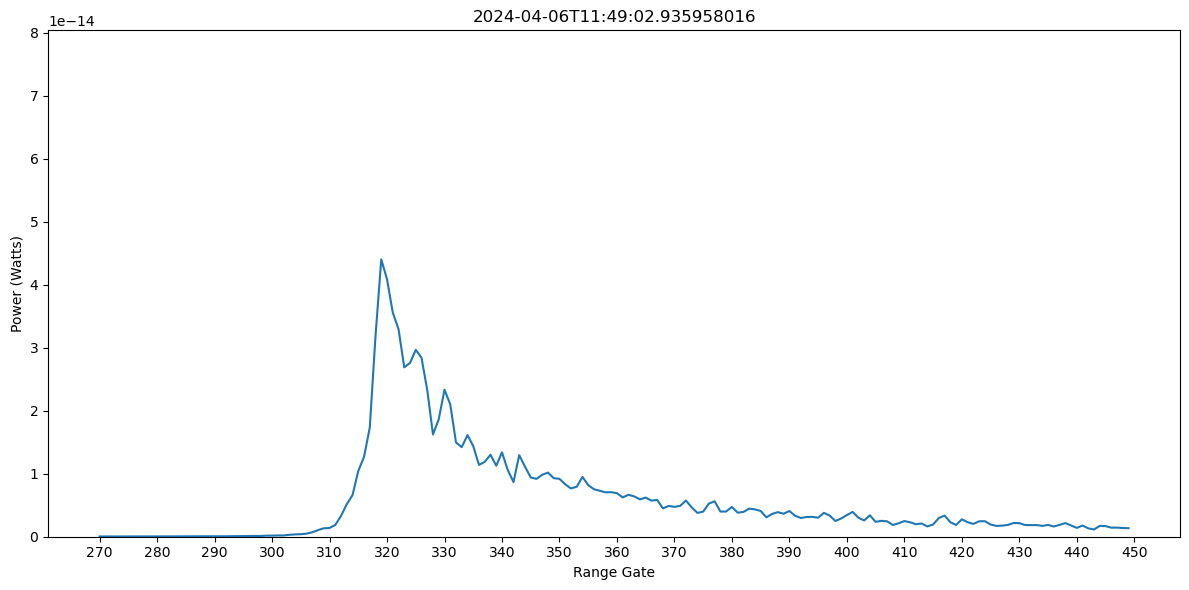

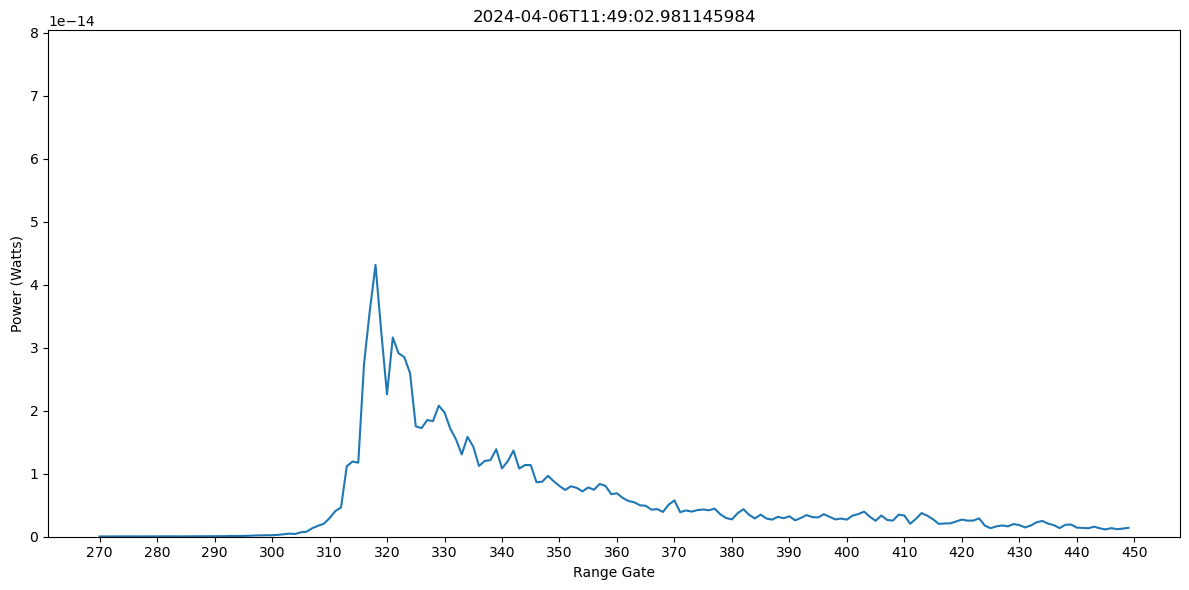

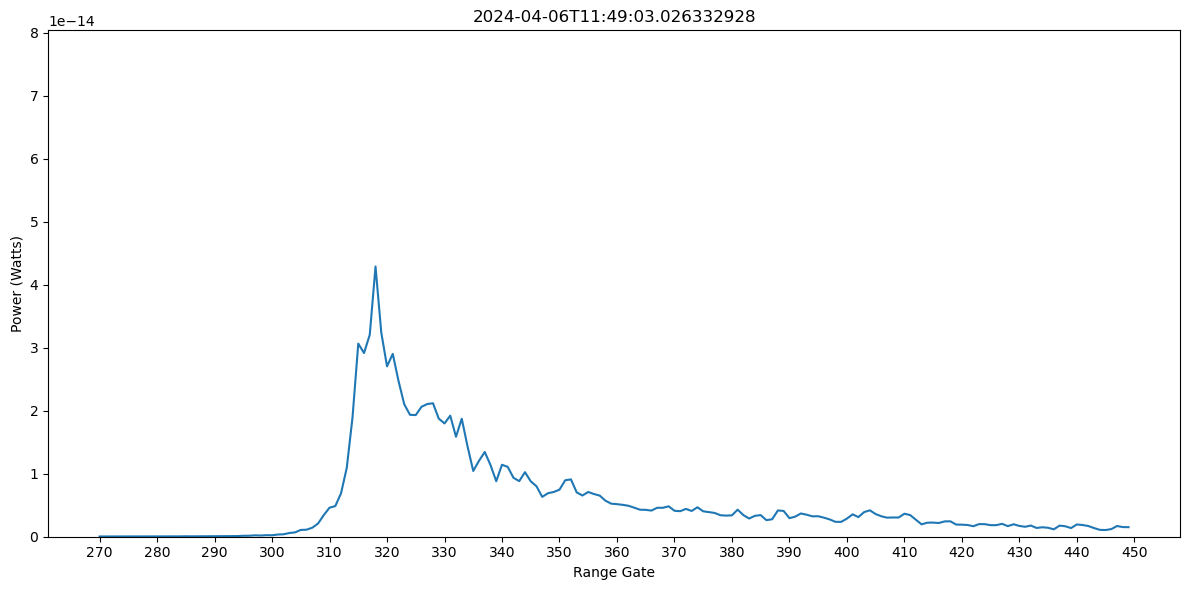

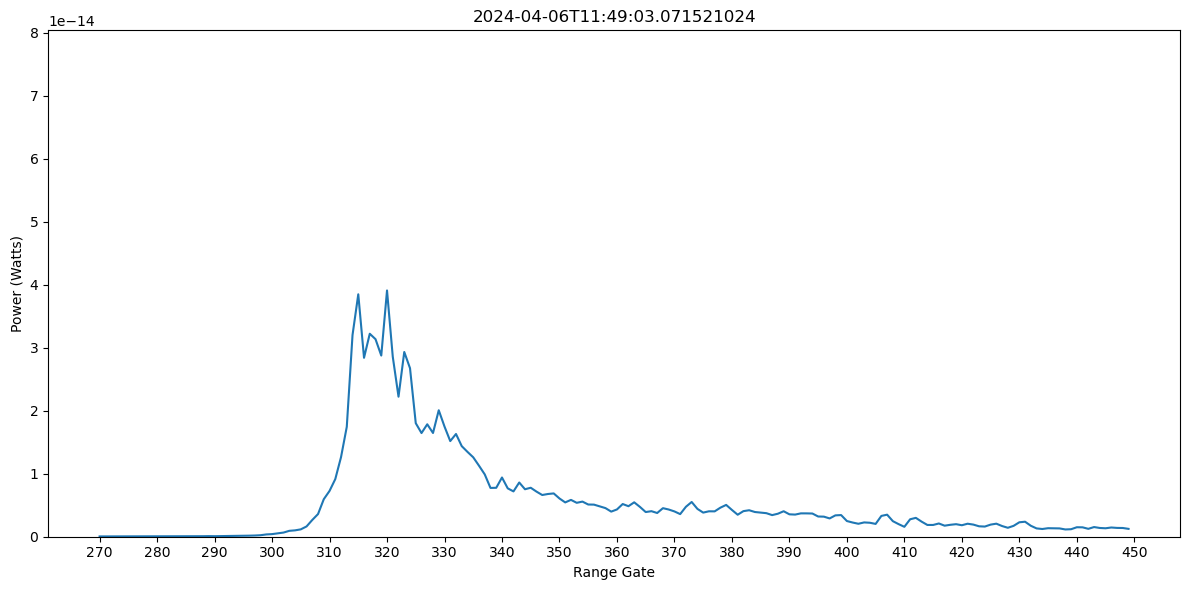

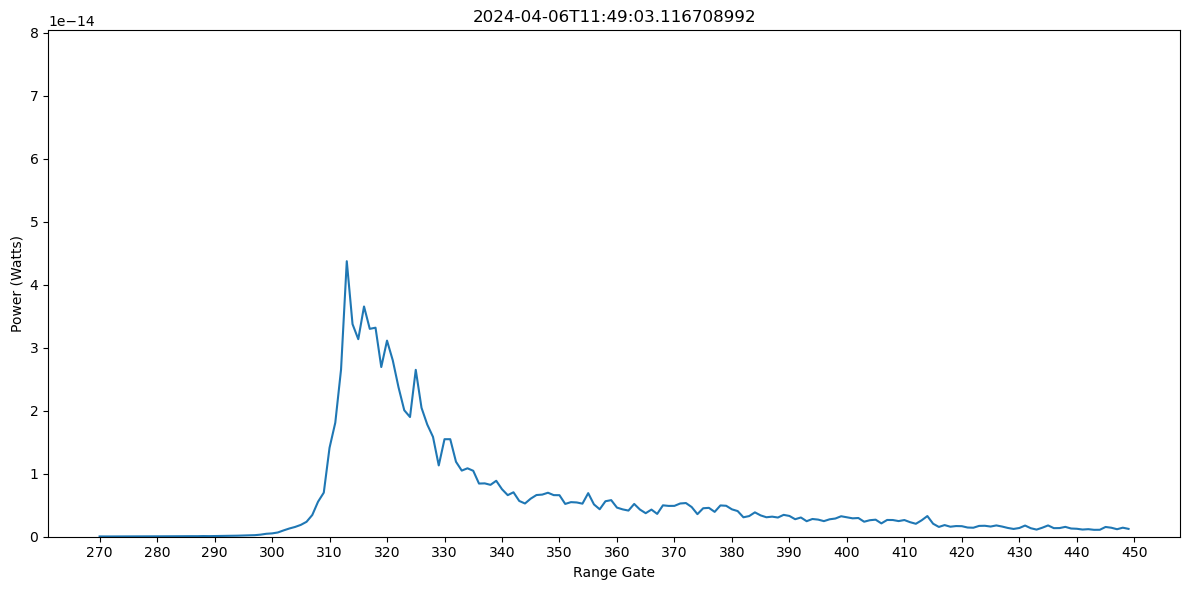

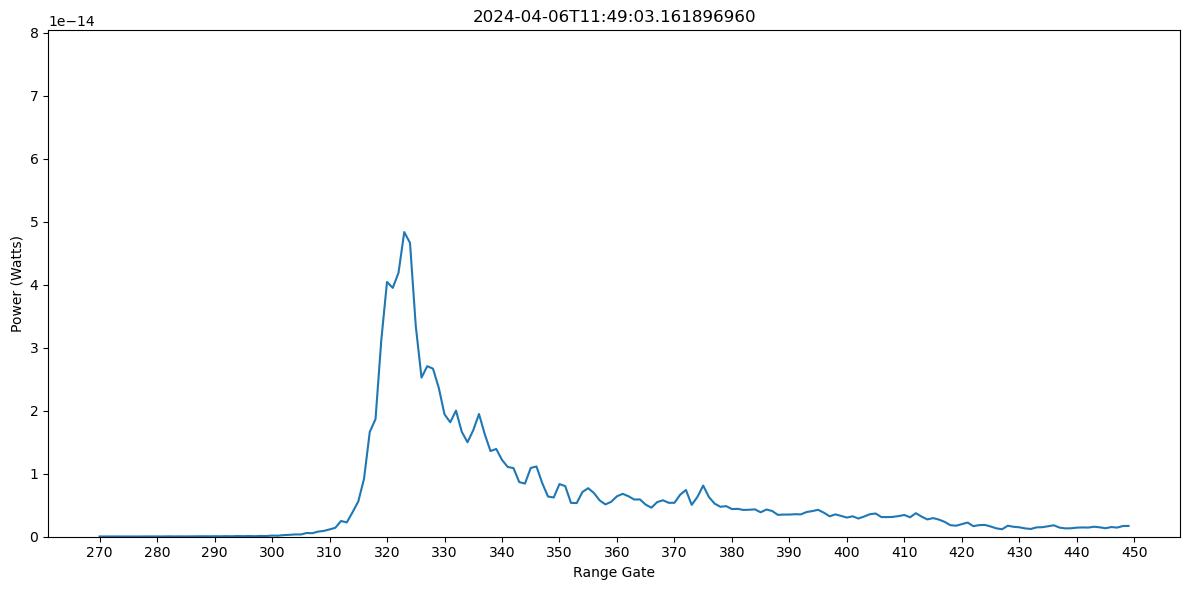

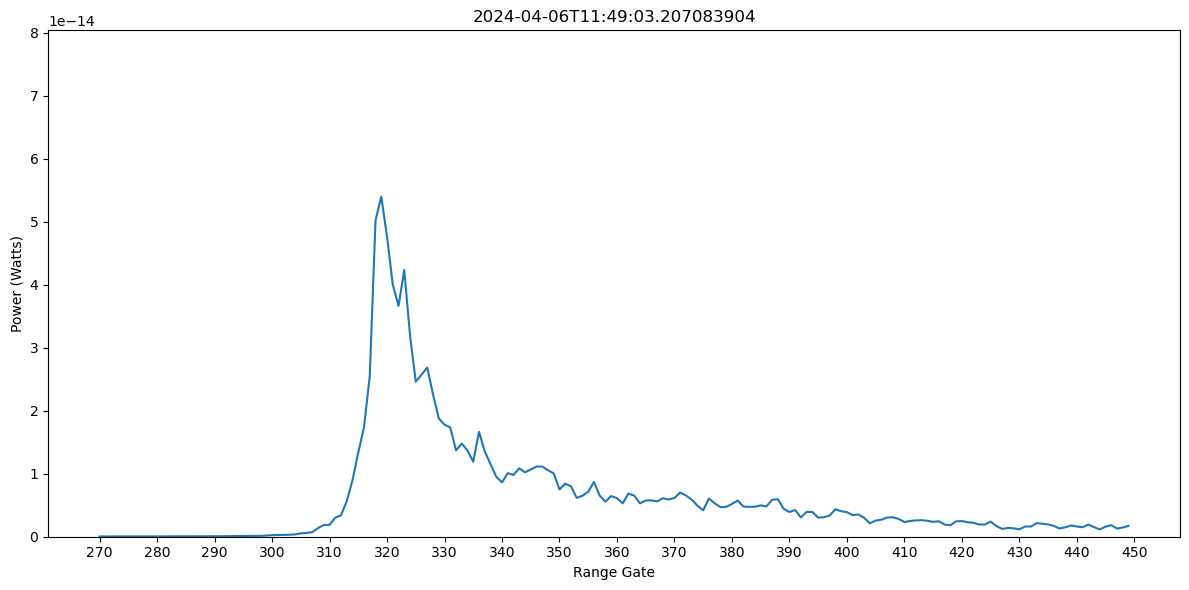

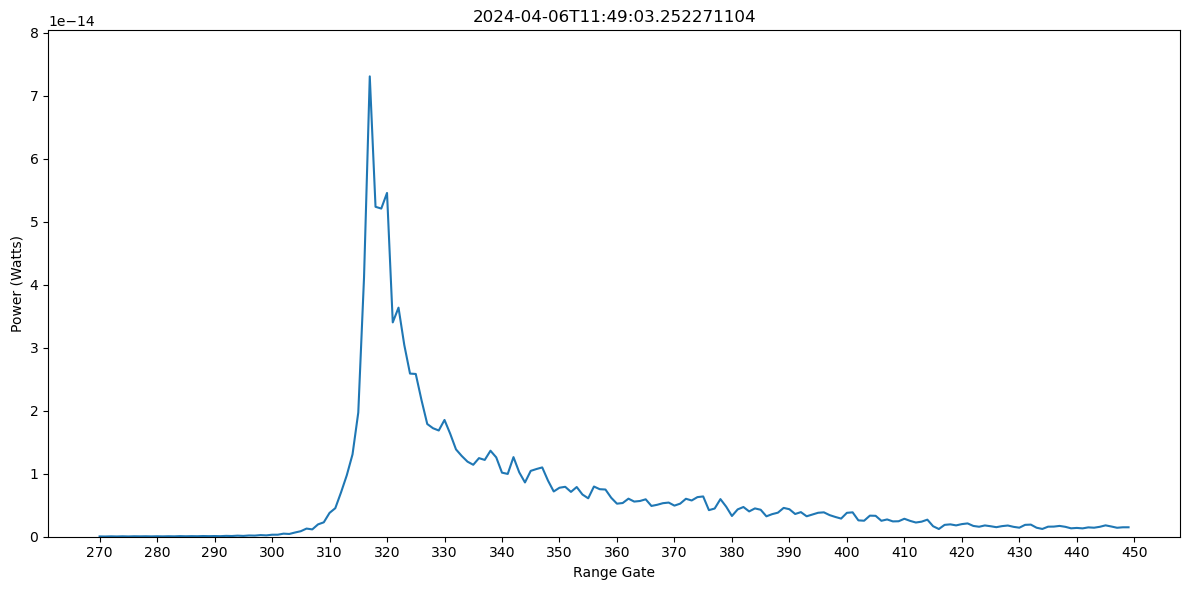

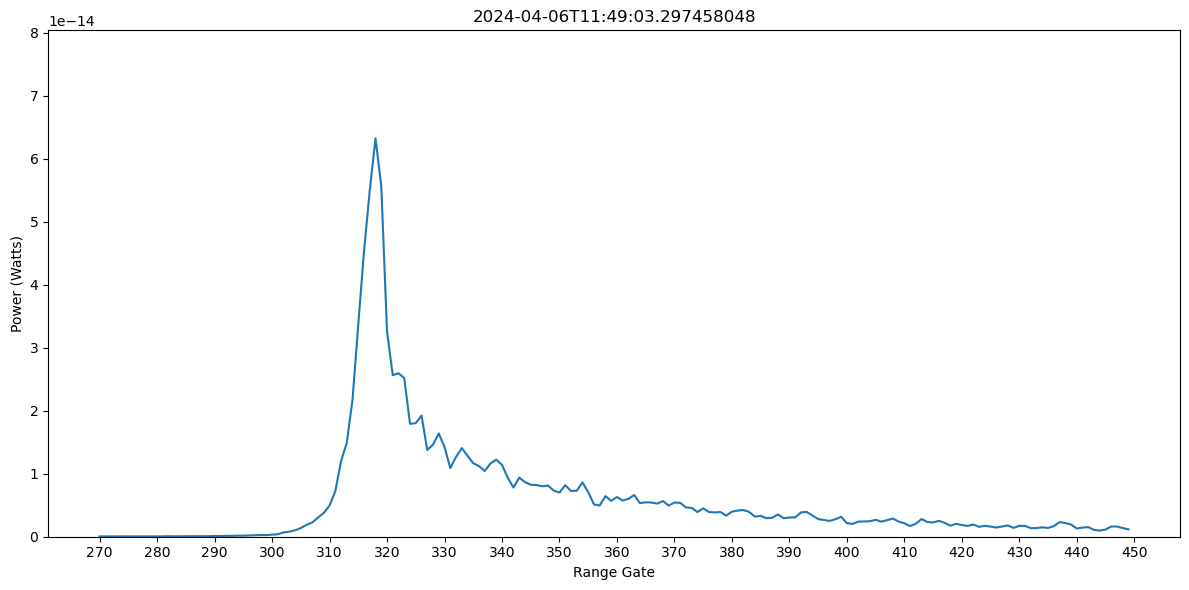

In [212]:
# Individual plots
n_to_plot = len(ds1_bbox.rec_count_20_ku)
# fig, axs = plt.subplots(n_to_plot, 2, figsize=(12, 2.5 * n_to_plot), sharex=True, sharey=True)

# Plot each waveform pair
for i in range(n_to_plot):
    # axs[i, 0] = plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450) #.plot_wfm(ns, waveforms1[i], color="blue")
    axs[i, 1] = plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450)
    # axs[i, 1] = plot_wfm(ds2_bbox, i, bin_start=270, bin_end=450)
    # axs[i, 1] = plot_wfm(ds2_bbox, i, bin_start=230, bin_end=410) # Thin case 20240522
    plt.savefig(f"wfm_fig{i}.png")
#     axs[i, 0].set_ylabel("Power")
#     axs[i, 0].set_title(f"Lat {lats1[i]:.4f}, Lon {lons1[i]:.4f}")
#     axs[i, 1].set_title(f"Lat {lats2[i]:.4f}, Lon {lons2[i]:.4f}")

# # Label x-axis of bottom row
# for ax in axs[-1, :]:
#     ax.set_xlabel("ns_20_ku (Bin Index)")

# # Add column titles
# fig.text(0.26, 0.95, "20240406", fontsize=14, fontweight='bold', ha='center')
# fig.text(0.74, 0.95, "20240519", fontsize=14, fontweight='bold', ha='center')

# plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space for top text
# plt.savefig("thick.pdf")
# plt.show()

In [7]:
plt.close('all')

### July 25, 2025 Get waveform power


In [48]:
def get_wfm_stat(ds, bin_start=0, bin_end=1024):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

# Apply scaling to convert waveforms to power in watts
# scaled_waveforms = waveforms * echo_scale_factor[:, None] * (2.0 ** echo_scale_pwr[:, None])
    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)
    # print(scaled_waveform[1, bin_start:bin_end].max())

    n_to_plot = len(ds.rec_count_20_ku)
    
    indices = range(len(ds.rec_count_20_ku))

    records = []

    for idx in indices:
        wf = scaled_waveform[idx, bin_start:bin_end]
        max_val = wf.max()
        # max_bin = bin_start + np.argmax(scaled_waveform[idx, bin_start:bin_end])
        mean_val = np.mean(wf)
        std_val = np.std(wf)

            
        records.append({
            # 'index': idx,
            'latitude': latitudes[idx].values,
            'longitude': longitudes[idx].values,
            'time': time[idx].values,
            'max_value': max_val.values,
            # 'max_bin': max_bin
            'mean_value': mean_val.values,
            'std_value': std_val.values
        })

    df = pd.DataFrame.from_records(records)
    return df

In [53]:
stat_0406 = get_wfm_stat(ds1_bbox)
stat_0406.to_csv('cs2_stat_0406.csv', index=False)

In [49]:
stat_0519 = get_wfm_stat(ds2_bbox)
stat_0519.to_csv('cs2_stat_0519.csv', index=False)

In [57]:
ds1_bbox.time_20_ku

<xarray.DataArray 'time_20_ku' (time_20_ku: 24)>
array(['2024-04-11T10:54:35.451149952', '2024-04-11T10:54:35.496296064',
       '2024-04-11T10:54:35.541442048', '2024-04-11T10:54:35.586587008',
       '2024-04-11T10:54:35.631732992', '2024-04-11T10:54:35.676879104',
       '2024-04-11T10:54:35.722023936', '2024-04-11T10:54:35.767169024',
       '2024-04-11T10:54:35.812315008', '2024-04-11T10:54:35.857460992',
       '2024-04-11T10:54:35.902605952', '2024-04-11T10:54:35.947751040',
       '2024-04-11T10:54:35.992896000', '2024-04-11T10:54:36.038040960',
       '2024-04-11T10:54:36.083186048', '2024-04-11T10:54:36.128331008',
       '2024-04-11T10:54:36.173475968', '2024-04-11T10:54:36.218621056',
       '2024-04-11T10:54:36.263766016', '2024-04-11T10:54:36.308910976',
       '2024-04-11T10:54:36.354056960', '2024-04-11T10:54:36.399202048',
       '2024-04-11T10:54:36.444347008', '2024-04-11T10:54:36.489492096'],
      dtype='datetime64[ns]')
Coordinates:
    lat_20_ku   (time_20_ku) float64 80.3 80.3 80.29 80.29 ... 80.24 80.24 80.24
    lon_20_ku   (time_20_ku) float64 -86.93 -86.94 -86.94 ... -87.01 -87.02
  * time_20_ku  (time_20_ku) datetime64[ns] 2024-04-11T10:54:35.451149952 ......
Attributes:
    comment:        TAI time counted in seconds since 2000-01-01 00:00:00. Ti...
    long_name:      time in TAI: seconds since 1 Jan 2000
    standard_name:  time

In [59]:
stat_0411 = get_wfm_stat(ds1_bbox)
stat_0411.to_csv('cs2_stat_0411.csv', index=False)

In [58]:
stat_0522 = get_wfm_stat(ds2_bbox)
stat_0522.to_csv('cs2_stat_0522.csv', index=False)